# ♻️ Project 01:  쓰레기 분류
---

## 주제: 쓰레기 분류 (사전 훈련 모델 + 분류기)
---

### 목표 (Target)
- **옷** (Clothes)
- **유리** (Glass)
- **금속** (Metal)
- **종이** (Paper)
- **플라스틱** (Plastic)


### 목차
1. 이미지 불러오기.
2. 데이터 프레임으로 file 경로 및 target 분류.
3. 데이터 훈련.
4. 데이터 검증.
5. 결론.

## 1. 이미지 불러오기

In [15]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

IMAGE_SIZE = 128
BATCH_SIZE = 64

idg = ImageDataGenerator()

original_dir = './datasets/p_GARBAGE DATASET/GARBAGE DATASET/original/'
original_generator = idg.flow_from_directory(original_dir,
                                             target_size = (IMAGE_SIZE, IMAGE_SIZE),
                                             batch_size = BATCH_SIZE,
                                             class_mode = 'categorical',
                                             shuffle = True)

test_dir = './datasets/p_GARBAGE DATASET/GARBAGE DATASET/Test'
test_generator = idg.flow_from_directory(original_dir,
                                             target_size = (IMAGE_SIZE, IMAGE_SIZE),
                                             batch_size = BATCH_SIZE,
                                             class_mode = 'categorical')

print(original_generator.class_indices)
print(test_generator.class_indices)

Found 1201 images belonging to 5 classes.
Found 1201 images belonging to 5 classes.
{'CLOTHES': 0, 'GLASS': 1, 'METAL': 2, 'PAPER': 3, 'PLASTIC': 4}
{'CLOTHES': 0, 'GLASS': 1, 'METAL': 2, 'PAPER': 3, 'PLASTIC': 4}


In [16]:
target_name = {v: k for k, v in original_generator.class_indices.items()}
target_name

{0: 'CLOTHES', 1: 'GLASS', 2: 'METAL', 3: 'PAPER', 4: 'PLASTIC'}

In [17]:
original_target_names = []
test_target_names = []

for target in original_generator.classes:
    original_target_names.append(target_name[target])

for target in test_generator.classes:
    test_target_names.append(target_name[target])
    
print(original_target_names.__len__(), test_target_names.__len__())

1201 1201


## 2. 데이터 프레임으로 file 경로 및 target 분류.

In [18]:
import pandas as pd

original_df = pd.DataFrame({'file_paths': original_generator.filepaths, 'target_names': original_target_names, 'targets': original_generator.classes})

test_df = pd.DataFrame({'file_paths': test_generator.filepaths, 'target_names': test_target_names, 'targets': test_generator.classes})

display(original_df)
display(test_df)

file_paths target_names  targets
0     ./datasets/p_GARBAGE DATASET/GARBAGE DATASET/o...      CLOTHES        0
1     ./datasets/p_GARBAGE DATASET/GARBAGE DATASET/o...      CLOTHES        0
2     ./datasets/p_GARBAGE DATASET/GARBAGE DATASET/o...      CLOTHES        0
3     ./datasets/p_GARBAGE DATASET/GARBAGE DATASET/o...      CLOTHES        0
4     ./datasets/p_GARBAGE DATASET/GARBAGE DATASET/o...      CLOTHES        0
...                                                 ...          ...      ...
1196  ./datasets/p_GARBAGE DATASET/GARBAGE DATASET/o...      PLASTIC        4
1197  ./datasets/p_GARBAGE DATASET/GARBAGE DATASET/o...      PLASTIC        4
1198  ./datasets/p_GARBAGE DATASET/GARBAGE DATASET/o...      PLASTIC        4
1199  ./datasets/p_GARBAGE DATASET/GARBAGE DATASET/o...      PLASTIC        4
1200  ./datasets/p_GARBAGE DATASET/GARBAGE DATASET/o...      PLASTIC        4

[1201 rows x 3 columns]

file_paths target_names  targets
0     ./datasets/p_GARBAGE DATASET/GARBAGE DATASET/o...      CLOTHES        0
1     ./datasets/p_GARBAGE DATASET/GARBAGE DATASET/o...      CLOTHES        0
2     ./datasets/p_GARBAGE DATASET/GARBAGE DATASET/o...      CLOTHES        0
3     ./datasets/p_GARBAGE DATASET/GARBAGE DATASET/o...      CLOTHES        0
4     ./datasets/p_GARBAGE DATASET/GARBAGE DATASET/o...      CLOTHES        0
...                                                 ...          ...      ...
1196  ./datasets/p_GARBAGE DATASET/GARBAGE DATASET/o...      PLASTIC        4
1197  ./datasets/p_GARBAGE DATASET/GARBAGE DATASET/o...      PLASTIC        4
1198  ./datasets/p_GARBAGE DATASET/GARBAGE DATASET/o...      PLASTIC        4
1199  ./datasets/p_GARBAGE DATASET/GARBAGE DATASET/o...      PLASTIC        4
1200  ./datasets/p_GARBAGE DATASET/GARBAGE DATASET/o...      PLASTIC        4

[1201 rows x 3 columns]

In [19]:
from sklearn.model_selection import train_test_split

train_images, validation_images, train_targets, validation_targets = \
train_test_split(original_df.file_paths, 
                 original_df.targets, 
                 stratify=original_df.targets, 
                 test_size=0.2, random_state=124)

print(train_targets.value_counts())
print(validation_targets.value_counts())

targets
4    336
3    199
1    193
0    144
2     88
Name: count, dtype: int64
targets
4    85
3    50
1    48
0    36
2    22
Name: count, dtype: int64


In [20]:
train_df = original_df.iloc[train_images.index].reset_index(drop=True)
validation_df = original_df.iloc[validation_images.index].reset_index(drop=True)

print(train_df.shape)
print(validation_df.shape)
print(test_df.shape)

(960, 3)
(241, 3)
(1201, 3)


In [21]:
# import shutil
# import os.path

# base_dir = './datasets/p_GARBAGE DATASET/GARBAGE DATASET/'


# for filepath in train_images:
#     destination = base_dir + 'train/' + filepath[len(base_dir + '/original'):filepath.rindex('/')]
    
#     if not os.path.exists(destination):
#         os.makedirs(destination)
#     shutil.copy2(filepath, destination)

In [22]:
# import shutil
# import os.path

# base_dir = './datasets/p_GARBAGE DATASET/GARBAGE DATASET/'


# for filepath in train_images:
#     destination = base_dir + 'validation/' + filepath[len(base_dir + '/original'):filepath.rindex('/')]
    
#     if not os.path.exists(destination):
#         os.makedirs(destination)
#     shutil.copy2(filepath, destination)

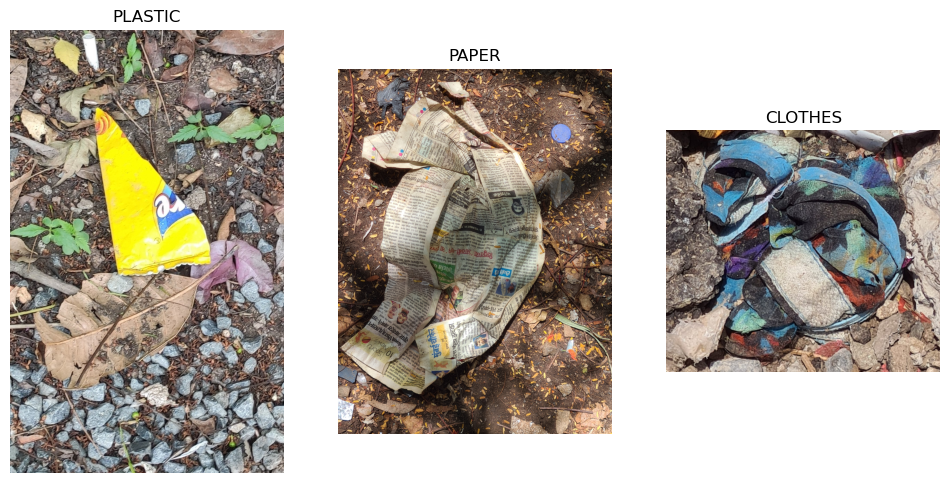

In [23]:
import cv2
import matplotlib.pyplot as plt

train_image = cv2.cvtColor(cv2.imread(train_df.file_paths.iloc[300]), cv2.COLOR_BGR2RGB)
validation_image = cv2.cvtColor(cv2.imread(validation_df.file_paths.iloc[40]), cv2.COLOR_BGR2RGB)
test_image = cv2.cvtColor(cv2.imread(test_df.file_paths.iloc[120]), cv2.COLOR_BGR2RGB)


figure, axs = plt.subplots(figsize= (12,12), nrows=1, ncols=3)

axs[0].imshow(train_image)
axs[0].set_title(train_df.target_names.iloc[300])
axs[0].axis('off')

axs[1].imshow(validation_image)
axs[1].set_title(validation_df.target_names.iloc[40])
axs[1].axis('off')

axs[2].imshow(test_image)
axs[2].set_title(test_df.target_names.iloc[120])
axs[2].axis('off')

plt.show()



# 3-1. 데이터프레임 Image 전처리 (applications = xception)

In [24]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import Xception
from tensorflow.keras.applications.xception import preprocess_input as xception_preprocess_input
import albumentations as A

IMAGE_SIZE = 128
BATCH_SIZE = 32

train_generator = ImageDataGenerator(preprocessing_function=xception_preprocess_input, rescale=1./255)
validation_generator = ImageDataGenerator(rescale=1./255)
test_generator = ImageDataGenerator(rescale=1./255)

train_flow = train_generator.flow_from_dataframe(dataframe=train_df,
                                                 x_col = 'file_paths', 
                                                 y_col = 'target_names',
                                                 target_size= (IMAGE_SIZE, IMAGE_SIZE),
                                                 class_mode='categorical',
                                                 shuffle=True)

validation_flow = validation_generator.flow_from_dataframe(dataframe=validation_df,
                                                 x_col = 'file_paths', 
                                                 y_col = 'target_names',
                                                 target_size= (IMAGE_SIZE, IMAGE_SIZE),
                                                 class_mode='categorical',
                                                 )

test_flow = test_generator.flow_from_dataframe(dataframe=test_df,
                                                 x_col = 'file_paths', 
                                                 y_col = 'target_names',
                                                 target_size= (IMAGE_SIZE, IMAGE_SIZE),
                                                 class_mode='categorical',
                                                 )

print(train_flow.class_indices)
print(validation_flow.class_indices)
print(test_flow.class_indices)


Found 960 validated image filenames belonging to 5 classes.
Found 241 validated image filenames belonging to 5 classes.
Found 1201 validated image filenames belonging to 5 classes.
{'CLOTHES': 0, 'GLASS': 1, 'METAL': 2, 'PAPER': 3, 'PLASTIC': 4}
{'CLOTHES': 0, 'GLASS': 1, 'METAL': 2, 'PAPER': 3, 'PLASTIC': 4}
{'CLOTHES': 0, 'GLASS': 1, 'METAL': 2, 'PAPER': 3, 'PLASTIC': 4}


In [14]:
model = Xception()
model.summary()

91884032/91884032 ━━━━━━━━━━━━━━━━━━━━ 76s 1us/step


Model: "xception"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 299, 299,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1_conv1        │ (None, 149, 149,  │        864 │ input_layer[0][0] │
│ (Conv2D)            │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1_conv1_bn     │ (None, 149, 149,  │        128 │ block1_conv1[0][… │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1_conv1_act    │ (None, 149, 149,  │          0 │ block1_conv1_bn[… │
│ (Activation)        │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1_conv2        │ (None, 147, 147,  │     18,432 │ block1_conv1_act… │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1_conv2_bn     │ (None, 147, 147,  │        256 │ block1_conv2[0][… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1_conv2_act    │ (None, 147, 147,  │          0 │ block1_conv2_bn[… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block2_sepconv1     │ (None, 147, 147,  │      8,768 │ block1_conv2_act… │
│ (SeparableConv2D)   │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block2_sepconv1_bn  │ (None, 147, 147,  │        512 │ block2_sepconv1[… │
│ (BatchNormalizatio… │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block2_sepconv2_act │ (None, 147, 147,  │          0 │ block2_sepconv1_… │
│ (Activation)        │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block2_sepconv2     │ (None, 147, 147,  │     17,536 │ block2_sepconv2_… │
│ (SeparableConv2D)   │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block2_sepconv2_bn  │ (None, 147, 147,  │        512 │ block2_sepconv2[… │
│ (BatchNormalizatio… │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d (Conv2D)     │ (None, 74, 74,    │      8,192 │ block1_conv2_act… │
│                     │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block2_pool         │ (None, 74, 74,    │          0 │ block2_sepconv2_… │
│ (MaxPooling2D)      │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalization │ (None, 74, 74,    │        512 │ conv2d[0][0]      │
│ (BatchNormalizatio… │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ add (Add)           │ (None, 74, 74,    │          0 │ block2_pool[0][0… │
│                     │ 128)              │            │ batch_normalizat… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block3_sepconv1_act │ (None, 74, 74,    │          0 │ add[0][0]       

 Total params: 22,910,480 (87.40 MB)

 Trainable params: 22,855,952 (87.19 MB)

 Non-trainable params: 54,528 (213.00 KB)

# 3-1-1. model 의 분류기에서 Dense 개수 조절을 위한 create_model 사용

In [25]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, Conv2D, Dropout, Flatten, Activation, MaxPooling2D, GlobalAveragePooling2D, BatchNormalization

from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.applications import ResNet50V2
from tensorflow.keras.applications import Xception
from tensorflow.keras.applications import MobileNetV2

IMAGE_SIZE = 128
BATCH_SIZE = 32

def create_model(model_name='vgg16', verbose=False):
    input_tensor = Input(shape=(IMAGE_SIZE, IMAGE_SIZE, 3))
    if model_name == 'vgg16':
        model = VGG16(input_tensor=input_tensor, include_top=False, weights='imagenet')
    elif model_name == 'resnet50':
        model = ResNet50V2(input_tensor=input_tensor, include_top=False, weights='imagenet')
    elif model_name == 'xception':
        model = Xception(input_tensor=input_tensor, include_top=False, weights='imagenet')
    elif model_name == 'mobilenet':
        model = MobileNetV2(input_tensor=input_tensor, include_top=False, weights='imagenet')

    x = model.output

    # 분류기
    x = GlobalAveragePooling2D()(x)
    if model_name != 'vgg16':
        x = Dropout(rate=0.5)(x)
    x = Dense(50, activation='relu')(x)
    if model_name != 'vgg16':
        x = Dropout(rate=0.5)(x)
    output = Dense(5, activation='softmax', name='output')(x)
    
    model = Model(inputs=input_tensor, outputs=output)
    
    if verbose:
        model.summary()
    
    return model

In [26]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import CategoricalCrossentropy
from tensorflow.keras.metrics import Accuracy

model = create_model(model_name='xception', verbose=True)
model.compile(optimizer=Adam(), loss= CategoricalCrossentropy(), metrics = ['acc'])

Model: "functional_3"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_2       │ (None, 128, 128,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1_conv1        │ (None, 63, 63,    │        864 │ input_layer_2[0]… │
│ (Conv2D)            │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1_conv1_bn     │ (None, 63, 63,    │        128 │ block1_conv1[0][… │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1_conv1_act    │ (None, 63, 63,    │          0 │ block1_conv1_bn[… │
│ (Activation)        │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1_conv2        │ (None, 61, 61,    │     18,432 │ block1_conv1_act… │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1_conv2_bn     │ (None, 61, 61,    │        256 │ block1_conv2[0][… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1_conv2_act    │ (None, 61, 61,    │          0 │ block1_conv2_bn[… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block2_sepconv1     │ (None, 61, 61,    │      8,768 │ block1_conv2_act… │
│ (SeparableConv2D)   │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block2_sepconv1_bn  │ (None, 61, 61,    │        512 │ block2_sepconv1[… │
│ (BatchNormalizatio… │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block2_sepconv2_act │ (None, 61, 61,    │          0 │ block2_sepconv1_… │
│ (Activation)        │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block2_sepconv2     │ (None, 61, 61,    │     17,536 │ block2_sepconv2_… │
│ (SeparableConv2D)   │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block2_sepconv2_bn  │ (None, 61, 61,    │        512 │ block2_sepconv2[… │
│ (BatchNormalizatio… │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_8 (Conv2D)   │ (None, 31, 31,    │      8,192 │ block1_conv2_act… │
│                     │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block2_pool         │ (None, 31, 31,    │          0 │ block2_sepconv2_… │
│ (MaxPooling2D)      │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 31, 31,    │        512 │ conv2d_8[0][0]    │
│ (BatchNormalizatio… │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ add_24 (Add)        │ (None, 31, 31,    │          0 │ block2_pool[0][0… │
│                     │ 128)              │            │ batch_normalizat… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block3_sepconv1_act │ (None, 31, 31,    │          0 │ add_24[0][0]    

 Total params: 20,964,185 (79.97 MB)

 Trainable params: 20,909,657 (79.76 MB)

 Non-trainable params: 54,528 (213.00 KB)

In [12]:
from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau, EarlyStopping

mcp_cb = ModelCheckpoint(
    filepath="./callback_files/project01/weights.{epoch:03d}-{val_loss:.4f}-{acc:.4f}.weights.h5",
    monitor='val_loss',
    save_best_only=True,
    save_weights_only=True,
    mode='min'
)

rlr_cb = ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.1,
    patience=2,
    mode='min'
)

ely_cb = EarlyStopping(
    monitor='val_loss',
    patience=4,
    mode='min'
)

In [29]:
N_EPOCHS = 2

history = model.fit(train_flow,
                    batch_size=BATCH_SIZE,
                    epochs=N_EPOCHS, 
                    validation_data=validation_flow,
                    callbacks=[mcp_cb, rlr_cb, ely_cb])

Epoch 1/2


/opt/anaconda3/lib/python3.11/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


30/30 ━━━━━━━━━━━━━━━━━━━━ 107s 3s/step - acc: 0.3192 - loss: 1.6046 - val_acc: 0.3983 - val_loss: 1.8872 - learning_rate: 0.0010
Epoch 2/2
30/30 ━━━━━━━━━━━━━━━━━━━━ 104s 3s/step - acc: 0.4867 - loss: 1.2544 - val_acc: 0.3859 - val_loss: 2.9542 - learning_rate: 0.0010


In [30]:
N_EPOCHS = 5

history = model.fit(train_flow,
                    batch_size=BATCH_SIZE,
                    epochs=N_EPOCHS, 
                    validation_data=validation_flow,
                    callbacks=[mcp_cb, rlr_cb, ely_cb])

Epoch 1/5
30/30 ━━━━━━━━━━━━━━━━━━━━ 98s 3s/step - acc: 0.6334 - loss: 1.0176 - val_acc: 0.3693 - val_loss: 2.3296 - learning_rate: 0.0010
Epoch 2/5
30/30 ━━━━━━━━━━━━━━━━━━━━ 104s 3s/step - acc: 0.7212 - loss: 0.8390 - val_acc: 0.3237 - val_loss: 3.6477 - learning_rate: 0.0010
Epoch 3/5
30/30 ━━━━━━━━━━━━━━━━━━━━ 115s 4s/step - acc: 0.7917 - loss: 0.7715 - val_acc: 0.3320 - val_loss: 3.6396 - learning_rate: 0.0010
Epoch 4/5
30/30 ━━━━━━━━━━━━━━━━━━━━ 105s 3s/step - acc: 0.8413 - loss: 0.4865 - val_acc: 0.3485 - val_loss: 3.6900 - learning_rate: 1.0000e-04


# 3-1-2. 모델에 대하여 학습률을 재정의 하여 compile 후 추가 학습 진행

In [31]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import CategoricalCrossentropy
from tensorflow.keras.metrics import Accuracy

model.compile(optimizer=Adam(1e-4), loss= CategoricalCrossentropy(), metrics = ['acc'])

In [32]:
N_EPOCHS = 5

history = model.fit(train_flow,
                    batch_size=BATCH_SIZE,
                    epochs=N_EPOCHS, 
                    validation_data=validation_flow,
                    callbacks=[mcp_cb, rlr_cb, ely_cb])

Epoch 1/5
30/30 ━━━━━━━━━━━━━━━━━━━━ 116s 3s/step - acc: 0.8990 - loss: 0.3356 - val_acc: 0.3485 - val_loss: 5.0977 - learning_rate: 1.0000e-04
Epoch 2/5
30/30 ━━━━━━━━━━━━━━━━━━━━ 120s 4s/step - acc: 0.9381 - loss: 0.2069 - val_acc: 0.3485 - val_loss: 6.5631 - learning_rate: 1.0000e-04
Epoch 3/5
30/30 ━━━━━━━━━━━━━━━━━━━━ 117s 4s/step - acc: 0.9673 - loss: 0.1233 - val_acc: 0.3527 - val_loss: 10.5687 - learning_rate: 1.0000e-04
Epoch 4/5
30/30 ━━━━━━━━━━━━━━━━━━━━ 111s 3s/step - acc: 0.9824 - loss: 0.0977 - val_acc: 0.3527 - val_loss: 15.7997 - learning_rate: 1.0000e-05


In [34]:
model.evaluate(test_flow, batch_size= BATCH_SIZE)

/opt/anaconda3/lib/python3.11/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


38/38 ━━━━━━━━━━━━━━━━━━━━ 41s 1s/step - acc: 0.3379 - loss: 16.2537


[15.588850021362305, 0.35054120421409607]

# 3-1-3. 과적합이 되지만 훈련 모델의 성능을 최대한 높여 과적합을 낮추는 방향으로 가기 위해 image_size를 증가하여 추가 훈련 진행.
- IMAGE_SIZE 128 -> 256

In [29]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import Xception
from tensorflow.keras.applications.xception import preprocess_input as xception_preprocess_input
import albumentations as A

IMAGE_SIZE = 256
BATCH_SIZE = 32

train_generator = ImageDataGenerator(preprocessing_function=xception_preprocess_input, rescale=1./255)
validation_generator = ImageDataGenerator(rescale=1./255)
test_generator = ImageDataGenerator(rescale=1./255)

train_flow = train_generator.flow_from_dataframe(dataframe=train_df,
                                                 x_col = 'file_paths', 
                                                 y_col = 'target_names',
                                                 target_size= (IMAGE_SIZE, IMAGE_SIZE),
                                                 class_mode='categorical',
                                                 shuffle=True)

validation_flow = validation_generator.flow_from_dataframe(dataframe=validation_df,
                                                 x_col = 'file_paths', 
                                                 y_col = 'target_names',
                                                 target_size= (IMAGE_SIZE, IMAGE_SIZE),
                                                 class_mode='categorical',
                                                 )

test_flow = test_generator.flow_from_dataframe(dataframe=test_df,
                                                 x_col = 'file_paths', 
                                                 y_col = 'target_names',
                                                 target_size= (IMAGE_SIZE, IMAGE_SIZE),
                                                 class_mode='categorical',
                                                 )

print(train_flow.class_indices)
print(validation_flow.class_indices)
print(test_flow.class_indices)

Found 960 validated image filenames belonging to 5 classes.
Found 241 validated image filenames belonging to 5 classes.
Found 1201 validated image filenames belonging to 5 classes.
{'CLOTHES': 0, 'GLASS': 1, 'METAL': 2, 'PAPER': 3, 'PLASTIC': 4}
{'CLOTHES': 0, 'GLASS': 1, 'METAL': 2, 'PAPER': 3, 'PLASTIC': 4}
{'CLOTHES': 0, 'GLASS': 1, 'METAL': 2, 'PAPER': 3, 'PLASTIC': 4}


In [36]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import CategoricalCrossentropy
from tensorflow.keras.metrics import Accuracy

model = create_model(model_name='xception', verbose=True)
model.compile(optimizer=Adam(), loss= CategoricalCrossentropy(), metrics = ['acc'])

Model: "functional_5"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_3       │ (None, 256, 256,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1_conv1        │ (None, 127, 127,  │        864 │ input_layer_3[0]… │
│ (Conv2D)            │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1_conv1_bn     │ (None, 127, 127,  │        128 │ block1_conv1[0][… │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1_conv1_act    │ (None, 127, 127,  │          0 │ block1_conv1_bn[… │
│ (Activation)        │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1_conv2        │ (None, 125, 125,  │     18,432 │ block1_conv1_act… │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1_conv2_bn     │ (None, 125, 125,  │        256 │ block1_conv2[0][… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1_conv2_act    │ (None, 125, 125,  │          0 │ block1_conv2_bn[… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block2_sepconv1     │ (None, 125, 125,  │      8,768 │ block1_conv2_act… │
│ (SeparableConv2D)   │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block2_sepconv1_bn  │ (None, 125, 125,  │        512 │ block2_sepconv1[… │
│ (BatchNormalizatio… │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block2_sepconv2_act │ (None, 125, 125,  │          0 │ block2_sepconv1_… │
│ (Activation)        │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block2_sepconv2     │ (None, 125, 125,  │     17,536 │ block2_sepconv2_… │
│ (SeparableConv2D)   │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block2_sepconv2_bn  │ (None, 125, 125,  │        512 │ block2_sepconv2[… │
│ (BatchNormalizatio… │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_12 (Conv2D)  │ (None, 63, 63,    │      8,192 │ block1_conv2_act… │
│                     │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block2_pool         │ (None, 63, 63,    │          0 │ block2_sepconv2_… │
│ (MaxPooling2D)      │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 63, 63,    │        512 │ conv2d_12[0][0]   │
│ (BatchNormalizatio… │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ add_36 (Add)        │ (None, 63, 63,    │          0 │ block2_pool[0][0… │
│                     │ 128)              │            │ batch_normalizat… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block3_sepconv1_act │ (None, 63, 63,    │          0 │ add_36[0][0]    

 Total params: 20,964,185 (79.97 MB)

 Trainable params: 20,909,657 (79.76 MB)

 Non-trainable params: 54,528 (213.00 KB)

In [37]:
N_EPOCHS = 4

history = model.fit(train_flow,
                    batch_size=BATCH_SIZE,
                    epochs=N_EPOCHS, 
                    validation_data=validation_flow,
                    callbacks=[mcp_cb, rlr_cb, ely_cb])

Epoch 1/4


/opt/anaconda3/lib/python3.11/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


30/30 ━━━━━━━━━━━━━━━━━━━━ 390s 13s/step - acc: 0.2793 - loss: 1.6282 - val_acc: 0.3527 - val_loss: 1.5921 - learning_rate: 0.0010
Epoch 2/4
30/30 ━━━━━━━━━━━━━━━━━━━━ 375s 12s/step - acc: 0.3397 - loss: 1.5903 - val_acc: 0.3527 - val_loss: 1.5766 - learning_rate: 0.0010
Epoch 3/4
30/30 ━━━━━━━━━━━━━━━━━━━━ 394s 13s/step - acc: 0.3559 - loss: 1.5691 - val_acc: 0.3527 - val_loss: 1.5279 - learning_rate: 0.0010
Epoch 4/4
30/30 ━━━━━━━━━━━━━━━━━━━━ 382s 13s/step - acc: 0.3607 - loss: 1.5182 - val_acc: 0.3527 - val_loss: 1110.6400 - learning_rate: 0.0010


In [38]:
N_EPOCHS = 4

history = model.fit(train_flow,
                    batch_size=BATCH_SIZE,
                    epochs=N_EPOCHS, 
                    validation_data=validation_flow,
                    callbacks=[mcp_cb, rlr_cb, ely_cb])

Epoch 1/4
30/30 ━━━━━━━━━━━━━━━━━━━━ 356s 12s/step - acc: 0.3254 - loss: 1.5785 - val_acc: 0.3527 - val_loss: 61.4323 - learning_rate: 0.0010
Epoch 2/4
30/30 ━━━━━━━━━━━━━━━━━━━━ 416s 14s/step - acc: 0.3643 - loss: 1.4732 - val_acc: 0.3527 - val_loss: 19.6246 - learning_rate: 0.0010
Epoch 3/4
30/30 ━━━━━━━━━━━━━━━━━━━━ 402s 13s/step - acc: 0.3472 - loss: 1.4337 - val_acc: 0.3527 - val_loss: 46.0357 - learning_rate: 0.0010
Epoch 4/4
30/30 ━━━━━━━━━━━━━━━━━━━━ 412s 14s/step - acc: 0.3380 - loss: 1.4658 - val_acc: 0.3527 - val_loss: 44.4683 - learning_rate: 0.0010


In [1]:
import gc

gc.collect()

0

In [3]:
from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau, EarlyStopping

mcp_cb = ModelCheckpoint(
    filepath="./callback_files/project01/weights.{epoch:03d}-{val_loss:.4f}-{acc:.4f}.weights.h5",
    monitor='val_loss',
    save_best_only=False,
    save_weights_only=True,
    mode='min'
)

rlr_cb = ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.1,
    patience=2,
    mode='min'
)

ely_cb = EarlyStopping(
    monitor='val_loss',
    patience=4,
    mode='min'
)

In [31]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import CategoricalCrossentropy
from tensorflow.keras.metrics import Accuracy
from tensorflow.keras.models import load_model

model = create_model(model_name='xception', verbose=True)

# 기존에 훈련된 가중치 로드
model.load_weights('./callback_files/project01/weights.003-1.5279-0.3500.weights.h5')  # 실제 가중치 파일 경로로 변경
model.compile(optimizer=Adam(), loss= CategoricalCrossentropy(), metrics = ['acc'])

Model: "functional_9"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_4       │ (None, 256, 256,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1_conv1        │ (None, 127, 127,  │        864 │ input_layer_4[0]… │
│ (Conv2D)            │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1_conv1_bn     │ (None, 127, 127,  │        128 │ block1_conv1[0][… │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1_conv1_act    │ (None, 127, 127,  │          0 │ block1_conv1_bn[… │
│ (Activation)        │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1_conv2        │ (None, 125, 125,  │     18,432 │ block1_conv1_act… │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1_conv2_bn     │ (None, 125, 125,  │        256 │ block1_conv2[0][… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1_conv2_act    │ (None, 125, 125,  │          0 │ block1_conv2_bn[… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block2_sepconv1     │ (None, 125, 125,  │      8,768 │ block1_conv2_act… │
│ (SeparableConv2D)   │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block2_sepconv1_bn  │ (None, 125, 125,  │        512 │ block2_sepconv1[… │
│ (BatchNormalizatio… │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block2_sepconv2_act │ (None, 125, 125,  │          0 │ block2_sepconv1_… │
│ (Activation)        │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block2_sepconv2     │ (None, 125, 125,  │     17,536 │ block2_sepconv2_… │
│ (SeparableConv2D)   │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block2_sepconv2_bn  │ (None, 125, 125,  │        512 │ block2_sepconv2[… │
│ (BatchNormalizatio… │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_16 (Conv2D)  │ (None, 63, 63,    │      8,192 │ block1_conv2_act… │
│                     │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block2_pool         │ (None, 63, 63,    │          0 │ block2_sepconv2_… │
│ (MaxPooling2D)      │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 63, 63,    │        512 │ conv2d_16[0][0]   │
│ (BatchNormalizatio… │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ add_48 (Add)        │ (None, 63, 63,    │          0 │ block2_pool[0][0… │
│                     │ 128)              │            │ batch_normalizat… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block3_sepconv1_act │ (None, 63, 63,    │          0 │ add_48[0][0]    

 Total params: 20,964,185 (79.97 MB)

 Trainable params: 20,909,657 (79.76 MB)

 Non-trainable params: 54,528 (213.00 KB)

In [32]:
N_EPOCHS = 30

history = model.fit(train_flow,
                    batch_size=BATCH_SIZE,
                    epochs=N_EPOCHS, 
                    validation_data=validation_flow,
                    callbacks=[mcp_cb, rlr_cb, ely_cb])

Epoch 1/30


/opt/anaconda3/lib/python3.11/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


30/30 ━━━━━━━━━━━━━━━━━━━━ 287s 9s/step - acc: 0.3371 - loss: 1.5206 - val_acc: 0.3527 - val_loss: 3.5275 - learning_rate: 0.0010
Epoch 2/30
30/30 ━━━━━━━━━━━━━━━━━━━━ 289s 9s/step - acc: 0.3904 - loss: 1.3865 - val_acc: 0.3734 - val_loss: 1.6682 - learning_rate: 0.0010
Epoch 3/30
30/30 ━━━━━━━━━━━━━━━━━━━━ 324s 11s/step - acc: 0.5685 - loss: 1.1008 - val_acc: 0.3485 - val_loss: 5.9810 - learning_rate: 0.0010
Epoch 4/30
30/30 ━━━━━━━━━━━━━━━━━━━━ 321s 10s/step - acc: 0.7149 - loss: 0.8162 - val_acc: 0.3527 - val_loss: 36.0655 - learning_rate: 0.0010
Epoch 5/30
30/30 ━━━━━━━━━━━━━━━━━━━━ 374s 12s/step - acc: 0.8099 - loss: 0.5741 - val_acc: 0.3527 - val_loss: 42.8874 - learning_rate: 1.0000e-04
Epoch 6/30
30/30 ━━━━━━━━━━━━━━━━━━━━ 379s 12s/step - acc: 0.8856 - loss: 0.3932 - val_acc: 0.3527 - val_loss: 55.5311 - learning_rate: 1.0000e-04


# 3-1-4. 이미지를 증가 시켰음에도 불구하고 과적합이 지속적으로 발생되는 부분을 확인하여 초기 학습율을 재설정 후 훈련 진행.
- Adam(0.001) -> Adam(1e-4)

In [33]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import CategoricalCrossentropy
from tensorflow.keras.metrics import Accuracy
from tensorflow.keras.models import load_model

model = create_model(model_name='xception', verbose=True)
model.compile(optimizer=Adam(1e-4), loss= CategoricalCrossentropy(), metrics = ['acc'])

Model: "functional_11"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_5       │ (None, 256, 256,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1_conv1        │ (None, 127, 127,  │        864 │ input_layer_5[0]… │
│ (Conv2D)            │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1_conv1_bn     │ (None, 127, 127,  │        128 │ block1_conv1[0][… │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1_conv1_act    │ (None, 127, 127,  │          0 │ block1_conv1_bn[… │
│ (Activation)        │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1_conv2        │ (None, 125, 125,  │     18,432 │ block1_conv1_act… │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1_conv2_bn     │ (None, 125, 125,  │        256 │ block1_conv2[0][… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1_conv2_act    │ (None, 125, 125,  │          0 │ block1_conv2_bn[… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block2_sepconv1     │ (None, 125, 125,  │      8,768 │ block1_conv2_act… │
│ (SeparableConv2D)   │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block2_sepconv1_bn  │ (None, 125, 125,  │        512 │ block2_sepconv1[… │
│ (BatchNormalizatio… │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block2_sepconv2_act │ (None, 125, 125,  │          0 │ block2_sepconv1_… │
│ (Activation)        │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block2_sepconv2     │ (None, 125, 125,  │     17,536 │ block2_sepconv2_… │
│ (SeparableConv2D)   │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block2_sepconv2_bn  │ (None, 125, 125,  │        512 │ block2_sepconv2[… │
│ (BatchNormalizatio… │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_20 (Conv2D)  │ (None, 63, 63,    │      8,192 │ block1_conv2_act… │
│                     │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block2_pool         │ (None, 63, 63,    │          0 │ block2_sepconv2_… │
│ (MaxPooling2D)      │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 63, 63,    │        512 │ conv2d_20[0][0]   │
│ (BatchNormalizatio… │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ add_60 (Add)        │ (None, 63, 63,    │          0 │ block2_pool[0][0… │
│                     │ 128)              │            │ batch_normalizat… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block3_sepconv1_act │ (None, 63, 63,    │          0 │ add_60[0][0]    

 Total params: 20,964,185 (79.97 MB)

 Trainable params: 20,909,657 (79.76 MB)

 Non-trainable params: 54,528 (213.00 KB)

In [34]:
N_EPOCHS = 30

history = model.fit(train_flow,
                    batch_size=BATCH_SIZE,
                    epochs=N_EPOCHS, 
                    validation_data=validation_flow,
                    callbacks=[mcp_cb, rlr_cb, ely_cb])

Epoch 1/30
30/30 ━━━━━━━━━━━━━━━━━━━━ 335s 11s/step - acc: 0.2970 - loss: 1.5988 - val_acc: 0.3651 - val_loss: 1.3907 - learning_rate: 1.0000e-04
Epoch 2/30
30/30 ━━━━━━━━━━━━━━━━━━━━ 349s 11s/step - acc: 0.4709 - loss: 1.3350 - val_acc: 0.4398 - val_loss: 1.2989 - learning_rate: 1.0000e-04
Epoch 3/30
30/30 ━━━━━━━━━━━━━━━━━━━━ 364s 12s/step - acc: 0.6342 - loss: 0.9621 - val_acc: 0.4855 - val_loss: 1.2875 - learning_rate: 1.0000e-04
Epoch 4/30
30/30 ━━━━━━━━━━━━━━━━━━━━ 368s 12s/step - acc: 0.7787 - loss: 0.6861 - val_acc: 0.4938 - val_loss: 1.4031 - learning_rate: 1.0000e-04
Epoch 5/30
30/30 ━━━━━━━━━━━━━━━━━━━━ 368s 12s/step - acc: 0.8879 - loss: 0.4110 - val_acc: 0.3859 - val_loss: 1.7466 - learning_rate: 1.0000e-04
Epoch 6/30
30/30 ━━━━━━━━━━━━━━━━━━━━ 354s 12s/step - acc: 0.9179 - loss: 0.2993 - val_acc: 0.3444 - val_loss: 1.8782 - learning_rate: 1.0000e-05
Epoch 7/30
30/30 ━━━━━━━━━━━━━━━━━━━━ 359s 12s/step - acc: 0.9397 - loss: 0.2624 - val_acc: 0.3527 - val_loss: 1.9895 - lear

## 3-1-5. 분류기의 Dropout 비율을 조정하여 모델의 일반화 진행
- 0.5 -> 0.7

In [38]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import Xception
from tensorflow.keras.applications.xception import preprocess_input as xception_preprocess_input
import albumentations as A

IMAGE_SIZE = 256
BATCH_SIZE = 32

train_generator = ImageDataGenerator(preprocessing_function=xception_preprocess_input, rescale=1./255)
validation_generator = ImageDataGenerator(rescale=1./255)
test_generator = ImageDataGenerator(rescale=1./255)

train_flow = train_generator.flow_from_dataframe(dataframe=train_df,
                                                 x_col = 'file_paths', 
                                                 y_col = 'target_names',
                                                 target_size= (IMAGE_SIZE, IMAGE_SIZE),
                                                 class_mode='categorical',
                                                 shuffle=True)

validation_flow = validation_generator.flow_from_dataframe(dataframe=validation_df,
                                                 x_col = 'file_paths', 
                                                 y_col = 'target_names',
                                                 target_size= (IMAGE_SIZE, IMAGE_SIZE),
                                                 class_mode='categorical',
                                                 )

test_flow = test_generator.flow_from_dataframe(dataframe=test_df,
                                                 x_col = 'file_paths', 
                                                 y_col = 'target_names',
                                                 target_size= (IMAGE_SIZE, IMAGE_SIZE),
                                                 class_mode='categorical',
                                                 )

print(train_flow.class_indices)
print(validation_flow.class_indices)
print(test_flow.class_indices)

Found 960 validated image filenames belonging to 5 classes.
Found 241 validated image filenames belonging to 5 classes.
Found 1201 validated image filenames belonging to 5 classes.
{'CLOTHES': 0, 'GLASS': 1, 'METAL': 2, 'PAPER': 3, 'PLASTIC': 4}
{'CLOTHES': 0, 'GLASS': 1, 'METAL': 2, 'PAPER': 3, 'PLASTIC': 4}
{'CLOTHES': 0, 'GLASS': 1, 'METAL': 2, 'PAPER': 3, 'PLASTIC': 4}


In [39]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, Conv2D, Dropout, Flatten, Activation, MaxPooling2D, GlobalAveragePooling2D, BatchNormalization

from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.applications import ResNet50V2
from tensorflow.keras.applications import Xception
from tensorflow.keras.applications import MobileNetV2

IMAGE_SIZE = 256
BATCH_SIZE = 32

def create_model(model_name='vgg16', verbose=False):
    input_tensor = Input(shape=(IMAGE_SIZE, IMAGE_SIZE, 3))
    if model_name == 'vgg16':
        model = VGG16(input_tensor=input_tensor, include_top=False, weights='imagenet')
    elif model_name == 'resnet50':
        model = ResNet50V2(input_tensor=input_tensor, include_top=False, weights='imagenet')
    elif model_name == 'xception':
        model = Xception(input_tensor=input_tensor, include_top=False, weights='imagenet')
    elif model_name == 'mobilenet':
        model = MobileNetV2(input_tensor=input_tensor, include_top=False, weights='imagenet')

    x = model.output

    # 분류기
    x = GlobalAveragePooling2D()(x)
    if model_name != 'vgg16':
        x = Dropout(rate=0.7)(x)
    x = Dense(50, activation='relu')(x)
    if model_name != 'vgg16':
        x = Dropout(rate=0.7)(x)
    output = Dense(5, activation='softmax', name='output')(x)
    
    model = Model(inputs=input_tensor, outputs=output)
    
    if verbose:
        model.summary()
    
    return model

In [43]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import CategoricalCrossentropy
from tensorflow.keras.metrics import Accuracy
from tensorflow.keras.models import load_model

model = create_model(model_name='xception', verbose=True)
model.compile(optimizer=Adam(1e-4), loss= CategoricalCrossentropy(), metrics = ['acc'])

Model: "functional_15"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_7       │ (None, 256, 256,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1_conv1        │ (None, 127, 127,  │        864 │ input_layer_7[0]… │
│ (Conv2D)            │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1_conv1_bn     │ (None, 127, 127,  │        128 │ block1_conv1[0][… │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1_conv1_act    │ (None, 127, 127,  │          0 │ block1_conv1_bn[… │
│ (Activation)        │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1_conv2        │ (None, 125, 125,  │     18,432 │ block1_conv1_act… │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1_conv2_bn     │ (None, 125, 125,  │        256 │ block1_conv2[0][… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1_conv2_act    │ (None, 125, 125,  │          0 │ block1_conv2_bn[… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block2_sepconv1     │ (None, 125, 125,  │      8,768 │ block1_conv2_act… │
│ (SeparableConv2D)   │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block2_sepconv1_bn  │ (None, 125, 125,  │        512 │ block2_sepconv1[… │
│ (BatchNormalizatio… │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block2_sepconv2_act │ (None, 125, 125,  │          0 │ block2_sepconv1_… │
│ (Activation)        │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block2_sepconv2     │ (None, 125, 125,  │     17,536 │ block2_sepconv2_… │
│ (SeparableConv2D)   │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block2_sepconv2_bn  │ (None, 125, 125,  │        512 │ block2_sepconv2[… │
│ (BatchNormalizatio… │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_28 (Conv2D)  │ (None, 63, 63,    │      8,192 │ block1_conv2_act… │
│                     │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block2_pool         │ (None, 63, 63,    │          0 │ block2_sepconv2_… │
│ (MaxPooling2D)      │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 63, 63,    │        512 │ conv2d_28[0][0]   │
│ (BatchNormalizatio… │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ add_84 (Add)        │ (None, 63, 63,    │          0 │ block2_pool[0][0… │
│                     │ 128)              │            │ batch_normalizat… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block3_sepconv1_act │ (None, 63, 63,    │          0 │ add_84[0][0]    

 Total params: 20,964,185 (79.97 MB)

 Trainable params: 20,909,657 (79.76 MB)

 Non-trainable params: 54,528 (213.00 KB)

In [44]:
import gc

gc.collect()

38

In [45]:
N_EPOCHS = 30

history = model.fit(train_flow,
                    batch_size=BATCH_SIZE,
                    epochs=N_EPOCHS, 
                    validation_data=validation_flow,
                    callbacks=[mcp_cb, rlr_cb, ely_cb])

Epoch 1/30


/opt/anaconda3/lib/python3.11/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


30/30 ━━━━━━━━━━━━━━━━━━━━ 313s 10s/step - acc: 0.2506 - loss: 1.7305 - val_acc: 0.3527 - val_loss: 1.5389 - learning_rate: 1.0000e-04
Epoch 2/30
30/30 ━━━━━━━━━━━━━━━━━━━━ 311s 10s/step - acc: 0.2755 - loss: 1.5831 - val_acc: 0.3568 - val_loss: 1.5114 - learning_rate: 1.0000e-04
Epoch 3/30
30/30 ━━━━━━━━━━━━━━━━━━━━ 313s 10s/step - acc: 0.3047 - loss: 1.5351 - val_acc: 0.3651 - val_loss: 1.4615 - learning_rate: 1.0000e-04
Epoch 4/30
30/30 ━━━━━━━━━━━━━━━━━━━━ 330s 11s/step - acc: 0.3885 - loss: 1.3740 - val_acc: 0.3527 - val_loss: 1.4348 - learning_rate: 1.0000e-04


## 3-1-6. 규제를 통한 모델 일반화
- image_size = 128 다시 변경
- kernel_regularizer=l2(1e-4)

In [60]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, Conv2D, Dropout, Flatten, Activation, MaxPooling2D, GlobalAveragePooling2D, BatchNormalization
from tensorflow.keras.regularizers import l1, l2

from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.applications import ResNet50V2
from tensorflow.keras.applications import Xception
from tensorflow.keras.applications import MobileNetV2

IMAGE_SIZE = 128
BATCH_SIZE = 32

def create_model(model_name='vgg16', verbose=False):
    input_tensor = Input(shape=(IMAGE_SIZE, IMAGE_SIZE, 3))
    if model_name == 'vgg16':
        model = VGG16(input_tensor=input_tensor, include_top=False, weights='imagenet')
    elif model_name == 'resnet50':
        model = ResNet50V2(input_tensor=input_tensor, include_top=False, weights='imagenet')
    elif model_name == 'xception':
        model = Xception(input_tensor=input_tensor, include_top=False, weights='imagenet')
    elif model_name == 'mobilenet':
        model = MobileNetV2(input_tensor=input_tensor, include_top=False, weights='imagenet')

    x = model.output

    # 분류기
    x = GlobalAveragePooling2D()(x)
    if model_name != 'vgg16':
        x = Dropout(rate=0.5)(x)
    x = Dense(50, activation='relu')(x)
    if model_name != 'vgg16':
        x = Dropout(rate=0.5)(x)
    output = Dense(5, activation='softmax', kernel_regularizer=l2(1e-4), name='output')(x)
    
    model = Model(inputs=input_tensor, outputs=output)
    
    if verbose:
        model.summary()
    
    return model

In [61]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import Xception
from tensorflow.keras.applications.xception import preprocess_input as xception_preprocess_input
import albumentations as A

IMAGE_SIZE = 128
BATCH_SIZE = 32

train_generator = ImageDataGenerator(preprocessing_function=xception_preprocess_input, rescale=1./255)
validation_generator = ImageDataGenerator(rescale=1./255)
test_generator = ImageDataGenerator(rescale=1./255)

train_flow = train_generator.flow_from_dataframe(dataframe=train_df,
                                                 x_col = 'file_paths', 
                                                 y_col = 'target_names',
                                                 target_size= (IMAGE_SIZE, IMAGE_SIZE),
                                                 class_mode='categorical',
                                                 shuffle=True)

validation_flow = validation_generator.flow_from_dataframe(dataframe=validation_df,
                                                 x_col = 'file_paths', 
                                                 y_col = 'target_names',
                                                 target_size= (IMAGE_SIZE, IMAGE_SIZE),
                                                 class_mode='categorical',
                                                 )

test_flow = test_generator.flow_from_dataframe(dataframe=test_df,
                                                 x_col = 'file_paths', 
                                                 y_col = 'target_names',
                                                 target_size= (IMAGE_SIZE, IMAGE_SIZE),
                                                 class_mode='categorical',
                                                 )

print(train_flow.class_indices)
print(validation_flow.class_indices)
print(test_flow.class_indices)

Found 960 validated image filenames belonging to 5 classes.
Found 241 validated image filenames belonging to 5 classes.
Found 1201 validated image filenames belonging to 5 classes.
{'CLOTHES': 0, 'GLASS': 1, 'METAL': 2, 'PAPER': 3, 'PLASTIC': 4}
{'CLOTHES': 0, 'GLASS': 1, 'METAL': 2, 'PAPER': 3, 'PLASTIC': 4}
{'CLOTHES': 0, 'GLASS': 1, 'METAL': 2, 'PAPER': 3, 'PLASTIC': 4}


In [62]:
from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau, EarlyStopping

mcp_cb = ModelCheckpoint(
    filepath="./callback_files/project01/weights.{epoch:03d}-{val_loss:.4f}-{acc:.4f}.weights.h5",
    monitor='val_loss',
    save_best_only=False,
    save_weights_only=True,
    mode='min'
)

rlr_cb = ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.1,
    patience=2,
    mode='min'
)

ely_cb = EarlyStopping(
    monitor='val_loss',
    patience=4,
    mode='min'
)

In [63]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import CategoricalCrossentropy
from tensorflow.keras.metrics import Accuracy
from tensorflow.keras.models import load_model

model = create_model(model_name='xception', verbose=True)
model.compile(optimizer=Adam(), loss= CategoricalCrossentropy(), metrics = ['acc'])

Model: "functional_21"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_11      │ (None, 128, 128,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1_conv1        │ (None, 63, 63,    │        864 │ input_layer_11[0… │
│ (Conv2D)            │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1_conv1_bn     │ (None, 63, 63,    │        128 │ block1_conv1[0][… │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1_conv1_act    │ (None, 63, 63,    │          0 │ block1_conv1_bn[… │
│ (Activation)        │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1_conv2        │ (None, 61, 61,    │     18,432 │ block1_conv1_act… │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1_conv2_bn     │ (None, 61, 61,    │        256 │ block1_conv2[0][… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1_conv2_act    │ (None, 61, 61,    │          0 │ block1_conv2_bn[… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block2_sepconv1     │ (None, 61, 61,    │      8,768 │ block1_conv2_act… │
│ (SeparableConv2D)   │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block2_sepconv1_bn  │ (None, 61, 61,    │        512 │ block2_sepconv1[… │
│ (BatchNormalizatio… │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block2_sepconv2_act │ (None, 61, 61,    │          0 │ block2_sepconv1_… │
│ (Activation)        │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block2_sepconv2     │ (None, 61, 61,    │     17,536 │ block2_sepconv2_… │
│ (SeparableConv2D)   │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block2_sepconv2_bn  │ (None, 61, 61,    │        512 │ block2_sepconv2[… │
│ (BatchNormalizatio… │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_44 (Conv2D)  │ (None, 31, 31,    │      8,192 │ block1_conv2_act… │
│                     │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block2_pool         │ (None, 31, 31,    │          0 │ block2_sepconv2_… │
│ (MaxPooling2D)      │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 31, 31,    │        512 │ conv2d_44[0][0]   │
│ (BatchNormalizatio… │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ add_132 (Add)       │ (None, 31, 31,    │          0 │ block2_pool[0][0… │
│                     │ 128)              │            │ batch_normalizat… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block3_sepconv1_act │ (None, 31, 31,    │          0 │ add_132[0][0]   

 Total params: 20,964,185 (79.97 MB)

 Trainable params: 20,909,657 (79.76 MB)

 Non-trainable params: 54,528 (213.00 KB)

In [64]:
import gc

gc.collect()

39660

In [65]:
N_EPOCHS = 20

history = model.fit(train_flow,
                    batch_size=BATCH_SIZE,
                    epochs=N_EPOCHS, 
                    validation_data=validation_flow,
                    callbacks=[mcp_cb, rlr_cb, ely_cb])

Epoch 1/20


/opt/anaconda3/lib/python3.11/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


30/30 ━━━━━━━━━━━━━━━━━━━━ 80s 2s/step - acc: 0.2916 - loss: 1.6036 - val_acc: 0.3651 - val_loss: 4.5893 - learning_rate: 0.0010
Epoch 2/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 76s 2s/step - acc: 0.4939 - loss: 1.2295 - val_acc: 0.3278 - val_loss: 4.4997 - learning_rate: 0.0010
Epoch 3/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 79s 2s/step - acc: 0.5635 - loss: 1.1950 - val_acc: 0.4149 - val_loss: 2.0910 - learning_rate: 0.0010
Epoch 4/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 77s 2s/step - acc: 0.7102 - loss: 0.8400 - val_acc: 0.2407 - val_loss: 8.9502 - learning_rate: 0.0010
Epoch 5/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 78s 2s/step - acc: 0.7450 - loss: 0.7304 - val_acc: 0.2075 - val_loss: 3.6182 - learning_rate: 0.0010
Epoch 6/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 78s 2s/step - acc: 0.8624 - loss: 0.5166 - val_acc: 0.2075 - val_loss: 4.0801 - learning_rate: 1.0000e-04
Epoch 7/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 78s 2s/step - acc: 0.9126 - loss: 0.3169 - val_acc: 0.2075 - val_loss: 5.8921 - learning_rate: 1.0000e-04


In [66]:
N_EPOCHS = 20

history = model.fit(train_flow,
                    batch_size=BATCH_SIZE,
                    epochs=N_EPOCHS, 
                    validation_data=validation_flow,
                    callbacks=[mcp_cb, rlr_cb, ely_cb])

Epoch 1/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 74s 2s/step - acc: 0.9334 - loss: 0.2329 - val_acc: 0.2075 - val_loss: 10.2461 - learning_rate: 1.0000e-05
Epoch 2/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 76s 2s/step - acc: 0.9545 - loss: 0.2114 - val_acc: 0.2075 - val_loss: 17.4540 - learning_rate: 1.0000e-05
Epoch 3/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 77s 2s/step - acc: 0.9408 - loss: 0.2462 - val_acc: 0.2075 - val_loss: 28.6908 - learning_rate: 1.0000e-05
Epoch 4/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 80s 2s/step - acc: 0.9426 - loss: 0.2184 - val_acc: 0.2075 - val_loss: 45.1383 - learning_rate: 1.0000e-06


## 3-1-7. 기존 성능이 높았던 가중치를 사용하여 분류기의 분류기 조절 후 추가 훈련 진행
- Dropout 2건 추가, 일반화 진행

In [72]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, Conv2D, Dropout, Flatten, Activation, MaxPooling2D, GlobalAveragePooling2D, BatchNormalization
from tensorflow.keras.regularizers import l1, l2

from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.applications import ResNet50V2
from tensorflow.keras.applications import Xception
from tensorflow.keras.applications import MobileNetV2

IMAGE_SIZE = 128
BATCH_SIZE = 32

def create_model(model_name='vgg16', verbose=False):
    input_tensor = Input(shape=(IMAGE_SIZE, IMAGE_SIZE, 3))
    if model_name == 'vgg16':
        model = VGG16(input_tensor=input_tensor, include_top=False, weights='imagenet')
    elif model_name == 'resnet50':
        model = ResNet50V2(input_tensor=input_tensor, include_top=False, weights='imagenet')
    elif model_name == 'xception':
        model = Xception(input_tensor=input_tensor, include_top=False, weights='imagenet')
    elif model_name == 'mobilenet':
        model = MobileNetV2(input_tensor=input_tensor, include_top=False, weights='imagenet')

    x = model.output

    # 분류기
    x = GlobalAveragePooling2D()(x)
    x = Dropout(rate=0.5)(x)
    
    x = Dense(50, activation='relu')(x)
    x = Dropout(rate=0.5)(x)
    
    output = Dense(5, activation='softmax', kernel_regularizer=l2(1e-4), name='output')(x)
    
    model = Model(inputs=input_tensor, outputs=output)
    
    if verbose:
        model.summary()
    
    return model

In [73]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import CategoricalCrossentropy
from tensorflow.keras.metrics import Accuracy
from tensorflow.keras.models import load_model

model = create_model(model_name='xception', verbose=True)

# 기존에 훈련된 가중치 로드
model.load_weights('./callback_files/project01/weights.007-5.8921-0.9208.weights.h5')  # 실제 가중치 파일 경로로 변경
model.compile(optimizer=Adam(1e-4), loss= CategoricalCrossentropy(), metrics = ['acc'])

Model: "functional_25"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_13      │ (None, 128, 128,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1_conv1        │ (None, 63, 63,    │        864 │ input_layer_13[0… │
│ (Conv2D)            │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1_conv1_bn     │ (None, 63, 63,    │        128 │ block1_conv1[0][… │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1_conv1_act    │ (None, 63, 63,    │          0 │ block1_conv1_bn[… │
│ (Activation)        │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1_conv2        │ (None, 61, 61,    │     18,432 │ block1_conv1_act… │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1_conv2_bn     │ (None, 61, 61,    │        256 │ block1_conv2[0][… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1_conv2_act    │ (None, 61, 61,    │          0 │ block1_conv2_bn[… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block2_sepconv1     │ (None, 61, 61,    │      8,768 │ block1_conv2_act… │
│ (SeparableConv2D)   │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block2_sepconv1_bn  │ (None, 61, 61,    │        512 │ block2_sepconv1[… │
│ (BatchNormalizatio… │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block2_sepconv2_act │ (None, 61, 61,    │          0 │ block2_sepconv1_… │
│ (Activation)        │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block2_sepconv2     │ (None, 61, 61,    │     17,536 │ block2_sepconv2_… │
│ (SeparableConv2D)   │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block2_sepconv2_bn  │ (None, 61, 61,    │        512 │ block2_sepconv2[… │
│ (BatchNormalizatio… │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_52 (Conv2D)  │ (None, 31, 31,    │      8,192 │ block1_conv2_act… │
│                     │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block2_pool         │ (None, 31, 31,    │          0 │ block2_sepconv2_… │
│ (MaxPooling2D)      │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 31, 31,    │        512 │ conv2d_52[0][0]   │
│ (BatchNormalizatio… │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ add_156 (Add)       │ (None, 31, 31,    │          0 │ block2_pool[0][0… │
│                     │ 128)              │            │ batch_normalizat… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block3_sepconv1_act │ (None, 31, 31,    │          0 │ add_156[0][0]   

 Total params: 20,964,185 (79.97 MB)

 Trainable params: 20,909,657 (79.76 MB)

 Non-trainable params: 54,528 (213.00 KB)

In [77]:
import gc

gc.collect()

9949

In [75]:
N_EPOCHS = 20

history = model.fit(train_flow,
                    batch_size=BATCH_SIZE,
                    epochs=N_EPOCHS, 
                    validation_data=validation_flow,
                    callbacks=[mcp_cb, rlr_cb, ely_cb])

Epoch 1/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 94s 3s/step - acc: 0.9437 - loss: 0.2286 - val_acc: 0.2075 - val_loss: 9.5944 - learning_rate: 1.0000e-04
Epoch 2/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 92s 3s/step - acc: 0.9584 - loss: 0.1463 - val_acc: 0.2075 - val_loss: 16.4078 - learning_rate: 1.0000e-04
Epoch 3/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 89s 3s/step - acc: 0.9761 - loss: 0.1129 - val_acc: 0.2075 - val_loss: 27.9051 - learning_rate: 1.0000e-04
Epoch 4/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 86s 3s/step - acc: 0.9854 - loss: 0.0668 - val_acc: 0.2075 - val_loss: 45.3170 - learning_rate: 1.0000e-05


## 3-1-8. 데이터 증강을 통한 일반화 진행

In [76]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import Xception
from tensorflow.keras.applications.xception import preprocess_input as xception_preprocess_input
import albumentations as A

IMAGE_SIZE = 128
BATCH_SIZE = 32


def transform(image):
    aug = A.Compose([
        A.HorizontalFlip(p=0.5),
        A.VerticalFlip(p=0.5),
        A.OneOf([
            A.ColorJitter(p=0.5),
            A.RandomBrightnessContrast(brightness_limit=0.2, contrast_limit=0.2, p=0.5) 
        ], p=1)        
    ], p=0.5)

    return aug(image=image)['image']



train_generator = ImageDataGenerator(preprocessing_function=transform, rescale=1./255)
validation_generator = ImageDataGenerator(rescale=1./255)
test_generator = ImageDataGenerator(rescale=1./255)

train_flow = train_generator.flow_from_dataframe(dataframe=train_df,
                                                 x_col = 'file_paths', 
                                                 y_col = 'target_names',
                                                 target_size= (IMAGE_SIZE, IMAGE_SIZE),
                                                 class_mode='categorical',
                                                 shuffle=True)

validation_flow = validation_generator.flow_from_dataframe(dataframe=validation_df,
                                                 x_col = 'file_paths', 
                                                 y_col = 'target_names',
                                                 target_size= (IMAGE_SIZE, IMAGE_SIZE),
                                                 class_mode='categorical',
                                                 )

test_flow = test_generator.flow_from_dataframe(dataframe=test_df,
                                                 x_col = 'file_paths', 
                                                 y_col = 'target_names',
                                                 target_size= (IMAGE_SIZE, IMAGE_SIZE),
                                                 class_mode='categorical',
                                                 )

print(train_flow.class_indices)
print(validation_flow.class_indices)
print(test_flow.class_indices)

Found 960 validated image filenames belonging to 5 classes.
Found 241 validated image filenames belonging to 5 classes.
Found 1201 validated image filenames belonging to 5 classes.
{'CLOTHES': 0, 'GLASS': 1, 'METAL': 2, 'PAPER': 3, 'PLASTIC': 4}
{'CLOTHES': 0, 'GLASS': 1, 'METAL': 2, 'PAPER': 3, 'PLASTIC': 4}
{'CLOTHES': 0, 'GLASS': 1, 'METAL': 2, 'PAPER': 3, 'PLASTIC': 4}


In [78]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import CategoricalCrossentropy
from tensorflow.keras.metrics import Accuracy
from tensorflow.keras.models import load_model

model = create_model(model_name='xception', verbose=True)

model.compile(optimizer=Adam(1e-4), loss= CategoricalCrossentropy(), metrics = ['acc'])

Model: "functional_27"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_14      │ (None, 128, 128,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1_conv1        │ (None, 63, 63,    │        864 │ input_layer_14[0… │
│ (Conv2D)            │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1_conv1_bn     │ (None, 63, 63,    │        128 │ block1_conv1[0][… │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1_conv1_act    │ (None, 63, 63,    │          0 │ block1_conv1_bn[… │
│ (Activation)        │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1_conv2        │ (None, 61, 61,    │     18,432 │ block1_conv1_act… │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1_conv2_bn     │ (None, 61, 61,    │        256 │ block1_conv2[0][… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1_conv2_act    │ (None, 61, 61,    │          0 │ block1_conv2_bn[… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block2_sepconv1     │ (None, 61, 61,    │      8,768 │ block1_conv2_act… │
│ (SeparableConv2D)   │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block2_sepconv1_bn  │ (None, 61, 61,    │        512 │ block2_sepconv1[… │
│ (BatchNormalizatio… │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block2_sepconv2_act │ (None, 61, 61,    │          0 │ block2_sepconv1_… │
│ (Activation)        │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block2_sepconv2     │ (None, 61, 61,    │     17,536 │ block2_sepconv2_… │
│ (SeparableConv2D)   │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block2_sepconv2_bn  │ (None, 61, 61,    │        512 │ block2_sepconv2[… │
│ (BatchNormalizatio… │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_56 (Conv2D)  │ (None, 31, 31,    │      8,192 │ block1_conv2_act… │
│                     │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block2_pool         │ (None, 31, 31,    │          0 │ block2_sepconv2_… │
│ (MaxPooling2D)      │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 31, 31,    │        512 │ conv2d_56[0][0]   │
│ (BatchNormalizatio… │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ add_168 (Add)       │ (None, 31, 31,    │          0 │ block2_pool[0][0… │
│                     │ 128)              │            │ batch_normalizat… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block3_sepconv1_act │ (None, 31, 31,    │          0 │ add_168[0][0]   

 Total params: 20,964,185 (79.97 MB)

 Trainable params: 20,909,657 (79.76 MB)

 Non-trainable params: 54,528 (213.00 KB)

In [79]:
import gc

gc.collect()

729

In [80]:
N_EPOCHS = 20

history = model.fit(train_flow,
                    batch_size=BATCH_SIZE,
                    epochs=N_EPOCHS, 
                    validation_data=validation_flow,
                    callbacks=[mcp_cb, rlr_cb, ely_cb])

Epoch 1/20


/opt/anaconda3/lib/python3.11/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


30/30 ━━━━━━━━━━━━━━━━━━━━ 92s 3s/step - acc: 0.1979 - loss: 1.6782 - val_acc: 0.3776 - val_loss: 1.5654 - learning_rate: 1.0000e-04
Epoch 2/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 87s 3s/step - acc: 0.3160 - loss: 1.5894 - val_acc: 0.3734 - val_loss: 1.5133 - learning_rate: 1.0000e-04
Epoch 3/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 85s 3s/step - acc: 0.3722 - loss: 1.5158 - val_acc: 0.3693 - val_loss: 1.4529 - learning_rate: 1.0000e-04
Epoch 4/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 86s 3s/step - acc: 0.3659 - loss: 1.4747 - val_acc: 0.4025 - val_loss: 1.3838 - learning_rate: 1.0000e-04
Epoch 5/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 85s 3s/step - acc: 0.4570 - loss: 1.3614 - val_acc: 0.4481 - val_loss: 1.3069 - learning_rate: 1.0000e-04
Epoch 6/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 83s 3s/step - acc: 0.4604 - loss: 1.2842 - val_acc: 0.4606 - val_loss: 1.3066 - learning_rate: 1.0000e-04
Epoch 7/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 84s 3s/step - acc: 0.4806 - loss: 1.2444 - val_acc: 0.5228 - val_loss: 1.2000 - learning_rate: 1.0000e-04
Epo

In [87]:
import gc

gc.collect()

18106

In [88]:
model = create_model(model_name='xception', verbose=True)
model.load_weights('./callback_files/project01/z_best_weights.013-1.2882-0.6260.weights.h5')  # 실제 가중치 파일 경로로 변경
model.compile(optimizer=Adam(1e-4), loss= CategoricalCrossentropy(), metrics = ['acc'])

Model: "functional_29"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_15      │ (None, 128, 128,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1_conv1        │ (None, 63, 63,    │        864 │ input_layer_15[0… │
│ (Conv2D)            │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1_conv1_bn     │ (None, 63, 63,    │        128 │ block1_conv1[0][… │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1_conv1_act    │ (None, 63, 63,    │          0 │ block1_conv1_bn[… │
│ (Activation)        │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1_conv2        │ (None, 61, 61,    │     18,432 │ block1_conv1_act… │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1_conv2_bn     │ (None, 61, 61,    │        256 │ block1_conv2[0][… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1_conv2_act    │ (None, 61, 61,    │          0 │ block1_conv2_bn[… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block2_sepconv1     │ (None, 61, 61,    │      8,768 │ block1_conv2_act… │
│ (SeparableConv2D)   │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block2_sepconv1_bn  │ (None, 61, 61,    │        512 │ block2_sepconv1[… │
│ (BatchNormalizatio… │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block2_sepconv2_act │ (None, 61, 61,    │          0 │ block2_sepconv1_… │
│ (Activation)        │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block2_sepconv2     │ (None, 61, 61,    │     17,536 │ block2_sepconv2_… │
│ (SeparableConv2D)   │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block2_sepconv2_bn  │ (None, 61, 61,    │        512 │ block2_sepconv2[… │
│ (BatchNormalizatio… │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_60 (Conv2D)  │ (None, 31, 31,    │      8,192 │ block1_conv2_act… │
│                     │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block2_pool         │ (None, 31, 31,    │          0 │ block2_sepconv2_… │
│ (MaxPooling2D)      │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 31, 31,    │        512 │ conv2d_60[0][0]   │
│ (BatchNormalizatio… │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ add_180 (Add)       │ (None, 31, 31,    │          0 │ block2_pool[0][0… │
│                     │ 128)              │            │ batch_normalizat… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block3_sepconv1_act │ (None, 31, 31,    │          0 │ add_180[0][0]   

 Total params: 20,964,185 (79.97 MB)

 Trainable params: 20,909,657 (79.76 MB)

 Non-trainable params: 54,528 (213.00 KB)

In [89]:
N_EPOCHS = 20

history = model.fit(train_flow,
                    batch_size=BATCH_SIZE,
                    epochs=N_EPOCHS, 
                    validation_data=validation_flow,
                    callbacks=[mcp_cb, rlr_cb, ely_cb])

Epoch 1/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 93s 3s/step - acc: 0.5789 - loss: 1.0301 - val_acc: 0.5104 - val_loss: 1.5554 - learning_rate: 1.0000e-04
Epoch 2/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 85s 3s/step - acc: 0.6081 - loss: 0.9695 - val_acc: 0.5809 - val_loss: 1.4938 - learning_rate: 1.0000e-04
Epoch 3/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 85s 3s/step - acc: 0.6151 - loss: 0.9575 - val_acc: 0.5519 - val_loss: 1.4638 - learning_rate: 1.0000e-04
Epoch 4/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 90s 3s/step - acc: 0.6380 - loss: 0.8985 - val_acc: 0.5851 - val_loss: 1.4747 - learning_rate: 1.0000e-04


## 가중치 업로드 후 추가 훈련

In [93]:
gc.collect()

0

In [94]:
model = create_model(model_name='xception', verbose=True)
model.load_weights('./callback_files/project01/weights.004-1.4747-0.6323.weights.h5')  # 실제 가중치 파일 경로로 변경
model.compile(optimizer=Adam(1e-4), loss= CategoricalCrossentropy(), metrics = ['acc'])

Model: "functional_33"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_17      │ (None, 128, 128,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1_conv1        │ (None, 63, 63,    │        864 │ input_layer_17[0… │
│ (Conv2D)            │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1_conv1_bn     │ (None, 63, 63,    │        128 │ block1_conv1[0][… │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1_conv1_act    │ (None, 63, 63,    │          0 │ block1_conv1_bn[… │
│ (Activation)        │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1_conv2        │ (None, 61, 61,    │     18,432 │ block1_conv1_act… │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1_conv2_bn     │ (None, 61, 61,    │        256 │ block1_conv2[0][… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1_conv2_act    │ (None, 61, 61,    │          0 │ block1_conv2_bn[… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block2_sepconv1     │ (None, 61, 61,    │      8,768 │ block1_conv2_act… │
│ (SeparableConv2D)   │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block2_sepconv1_bn  │ (None, 61, 61,    │        512 │ block2_sepconv1[… │
│ (BatchNormalizatio… │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block2_sepconv2_act │ (None, 61, 61,    │          0 │ block2_sepconv1_… │
│ (Activation)        │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block2_sepconv2     │ (None, 61, 61,    │     17,536 │ block2_sepconv2_… │
│ (SeparableConv2D)   │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block2_sepconv2_bn  │ (None, 61, 61,    │        512 │ block2_sepconv2[… │
│ (BatchNormalizatio… │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_68 (Conv2D)  │ (None, 31, 31,    │      8,192 │ block1_conv2_act… │
│                     │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block2_pool         │ (None, 31, 31,    │          0 │ block2_sepconv2_… │
│ (MaxPooling2D)      │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 31, 31,    │        512 │ conv2d_68[0][0]   │
│ (BatchNormalizatio… │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ add_204 (Add)       │ (None, 31, 31,    │          0 │ block2_pool[0][0… │
│                     │ 128)              │            │ batch_normalizat… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block3_sepconv1_act │ (None, 31, 31,    │          0 │ add_204[0][0]   

 Total params: 20,964,185 (79.97 MB)

 Trainable params: 20,909,657 (79.76 MB)

 Non-trainable params: 54,528 (213.00 KB)

In [95]:
N_EPOCHS = 20

history = model.fit(train_flow,
                    batch_size=BATCH_SIZE,
                    epochs=N_EPOCHS, 
                    validation_data=validation_flow,
                    callbacks=[mcp_cb, rlr_cb, ely_cb])

Epoch 1/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 84s 2s/step - acc: 0.5826 - loss: 1.0378 - val_acc: 0.6141 - val_loss: 1.5285 - learning_rate: 1.0000e-04
Epoch 2/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 80s 2s/step - acc: 0.6620 - loss: 0.8352 - val_acc: 0.5892 - val_loss: 1.6747 - learning_rate: 1.0000e-04
Epoch 3/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 84s 3s/step - acc: 0.6242 - loss: 0.8981 - val_acc: 0.5892 - val_loss: 1.9733 - learning_rate: 1.0000e-04
Epoch 4/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 86s 3s/step - acc: 0.6512 - loss: 0.8556 - val_acc: 0.6141 - val_loss: 1.8687 - learning_rate: 1.0000e-05


In [99]:
gc.collect()

10696

In [97]:
model = create_model(model_name='xception', verbose=True)
model.load_weights('./callback_files/project01/weights.004-1.4747-0.6323.weights.h5')  # 실제 가중치 파일 경로로 변경
model.compile(optimizer=Adam(1e-4), loss= CategoricalCrossentropy(), metrics = ['acc'])

Model: "functional_35"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_18      │ (None, 128, 128,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1_conv1        │ (None, 63, 63,    │        864 │ input_layer_18[0… │
│ (Conv2D)            │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1_conv1_bn     │ (None, 63, 63,    │        128 │ block1_conv1[0][… │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1_conv1_act    │ (None, 63, 63,    │          0 │ block1_conv1_bn[… │
│ (Activation)        │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1_conv2        │ (None, 61, 61,    │     18,432 │ block1_conv1_act… │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1_conv2_bn     │ (None, 61, 61,    │        256 │ block1_conv2[0][… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1_conv2_act    │ (None, 61, 61,    │          0 │ block1_conv2_bn[… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block2_sepconv1     │ (None, 61, 61,    │      8,768 │ block1_conv2_act… │
│ (SeparableConv2D)   │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block2_sepconv1_bn  │ (None, 61, 61,    │        512 │ block2_sepconv1[… │
│ (BatchNormalizatio… │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block2_sepconv2_act │ (None, 61, 61,    │          0 │ block2_sepconv1_… │
│ (Activation)        │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block2_sepconv2     │ (None, 61, 61,    │     17,536 │ block2_sepconv2_… │
│ (SeparableConv2D)   │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block2_sepconv2_bn  │ (None, 61, 61,    │        512 │ block2_sepconv2[… │
│ (BatchNormalizatio… │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_72 (Conv2D)  │ (None, 31, 31,    │      8,192 │ block1_conv2_act… │
│                     │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block2_pool         │ (None, 31, 31,    │          0 │ block2_sepconv2_… │
│ (MaxPooling2D)      │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 31, 31,    │        512 │ conv2d_72[0][0]   │
│ (BatchNormalizatio… │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ add_216 (Add)       │ (None, 31, 31,    │          0 │ block2_pool[0][0… │
│                     │ 128)              │            │ batch_normalizat… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block3_sepconv1_act │ (None, 31, 31,    │          0 │ add_216[0][0]   

 Total params: 20,964,185 (79.97 MB)

 Trainable params: 20,909,657 (79.76 MB)

 Non-trainable params: 54,528 (213.00 KB)

In [98]:
N_EPOCHS = 20

history = model.fit(train_flow,
                    batch_size=BATCH_SIZE,
                    epochs=N_EPOCHS, 
                    validation_data=validation_flow,
                    callbacks=[mcp_cb, rlr_cb])

Epoch 1/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 94s 3s/step - acc: 0.6588 - loss: 0.8744 - val_acc: 0.5436 - val_loss: 1.9564 - learning_rate: 1.0000e-04
Epoch 2/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 85s 3s/step - acc: 0.6136 - loss: 0.8955 - val_acc: 0.5726 - val_loss: 2.1098 - learning_rate: 1.0000e-04
Epoch 3/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 84s 3s/step - acc: 0.6172 - loss: 0.9403 - val_acc: 0.5560 - val_loss: 1.9965 - learning_rate: 1.0000e-04
Epoch 4/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 91s 3s/step - acc: 0.6340 - loss: 0.8966 - val_acc: 0.5768 - val_loss: 1.6933 - learning_rate: 1.0000e-05
Epoch 5/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 85s 3s/step - acc: 0.6678 - loss: 0.8287 - val_acc: 0.5851 - val_loss: 1.5684 - learning_rate: 1.0000e-05
Epoch 6/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 90s 3s/step - acc: 0.6324 - loss: 0.8612 - val_acc: 0.5809 - val_loss: 1.5317 - learning_rate: 1.0000e-05
Epoch 7/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 94s 3s/step - acc: 0.6467 - loss: 0.8483 - val_acc: 0.5685 - val_loss: 1.5219 - learning_rate: 1.0

## 위에 까지 훈련한 내용에 대하여 추가적으로 훈련을 해야하지만 우선 mobilenet, resnet 모델 선호 사용.
## 3-1-8. mobilenet

In [112]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import Xception
from tensorflow.keras.applications.xception import preprocess_input as xception_preprocess_input
import albumentations as A

IMAGE_SIZE = 64
BATCH_SIZE = 32


def transform(image):
    aug = A.Compose([
        A.HorizontalFlip(p=0.5),
        A.VerticalFlip(p=0.5),
        A.OneOf([
            A.ColorJitter(p=0.5),
            A.RandomBrightnessContrast(brightness_limit=0.2, contrast_limit=0.2, p=0.5) 
        ], p=1)        
    ], p=0.5)

    return aug(image=image)['image']



train_generator = ImageDataGenerator(preprocessing_function=transform, rescale=1./255)
validation_generator = ImageDataGenerator(rescale=1./255)
test_generator = ImageDataGenerator(rescale=1./255)

train_flow = train_generator.flow_from_dataframe(dataframe=train_df,
                                                 x_col = 'file_paths', 
                                                 y_col = 'target_names',
                                                 target_size= (IMAGE_SIZE, IMAGE_SIZE),
                                                 class_mode='categorical',
                                                 shuffle=True)

validation_flow = validation_generator.flow_from_dataframe(dataframe=validation_df,
                                                 x_col = 'file_paths', 
                                                 y_col = 'target_names',
                                                 target_size= (IMAGE_SIZE, IMAGE_SIZE),
                                                 class_mode='categorical',
                                                 )

test_flow = test_generator.flow_from_dataframe(dataframe=test_df,
                                                 x_col = 'file_paths', 
                                                 y_col = 'target_names',
                                                 target_size= (IMAGE_SIZE, IMAGE_SIZE),
                                                 class_mode='categorical',
                                                 )

print(train_flow.class_indices)
print(validation_flow.class_indices)
print(test_flow.class_indices)

Found 960 validated image filenames belonging to 5 classes.
Found 241 validated image filenames belonging to 5 classes.
Found 1201 validated image filenames belonging to 5 classes.
{'CLOTHES': 0, 'GLASS': 1, 'METAL': 2, 'PAPER': 3, 'PLASTIC': 4}
{'CLOTHES': 0, 'GLASS': 1, 'METAL': 2, 'PAPER': 3, 'PLASTIC': 4}
{'CLOTHES': 0, 'GLASS': 1, 'METAL': 2, 'PAPER': 3, 'PLASTIC': 4}


In [113]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, Conv2D, Dropout, Flatten, Activation, MaxPooling2D, GlobalAveragePooling2D, BatchNormalization

from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.applications import ResNet50V2
from tensorflow.keras.applications import Xception
from tensorflow.keras.applications import MobileNetV2

IMAGE_SIZE = 64
BATCH_SIZE = 32

def create_model(model_name='vgg16', verbose=False):
    input_tensor = Input(shape=(IMAGE_SIZE, IMAGE_SIZE, 3))
    if model_name == 'vgg16':
        model = VGG16(input_tensor=input_tensor, include_top=False, weights='imagenet')
    elif model_name == 'resnet50':
        model = ResNet50V2(input_tensor=input_tensor, include_top=False, weights='imagenet')
    elif model_name == 'xception':
        model = Xception(input_tensor=input_tensor, include_top=False, weights='imagenet')
    elif model_name == 'mobilenet':
        model = MobileNetV2(input_tensor=input_tensor, include_top=False, weights='imagenet')

    x = model.output

    # 분류기
    x = GlobalAveragePooling2D()(x)
    if model_name != 'vgg16':
        x = Dropout(rate=0.5)(x)
    x = Dense(50, activation='relu')(x)
    if model_name != 'vgg16':
        x = Dropout(rate=0.5)(x)
    output = Dense(5, activation='softmax', name='output')(x)
    
    model = Model(inputs=input_tensor, outputs=output)
    
    if verbose:
        model.summary()
    
    return model

In [114]:
gc.collect()

38605

In [115]:
model = create_model(model_name='mobilenet', verbose=True)
model.compile(optimizer=Adam(1e-4), loss= CategoricalCrossentropy(), metrics = ['acc'])

/var/folders/f7/gl6wpvqx5z596rbpjsq5n3tc0000gn/T/ipykernel_3634/2723875416.py:21: UserWarning: `input_shape` is undefined or non-square, or `rows` is not in [96, 128, 160, 192, 224]. Weights for input shape (224, 224) will be loaded as the default.
  model = MobileNetV2(input_tensor=input_tensor, include_top=False, weights='imagenet')


Model: "functional_41"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_21      │ (None, 64, 64, 3) │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ Conv1 (Conv2D)      │ (None, 32, 32,    │        864 │ input_layer_21[0… │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ bn_Conv1            │ (None, 32, 32,    │        128 │ Conv1[0][0]       │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ Conv1_relu (ReLU)   │ (None, 32, 32,    │          0 │ bn_Conv1[0][0]    │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 32, 32,    │        288 │ Conv1_relu[0][0]  │
│ (DepthwiseConv2D)   │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 32, 32,    │        128 │ expanded_conv_de… │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 32, 32,    │          0 │ expanded_conv_de… │
│ (ReLU)              │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_proj… │ (None, 32, 32,    │        512 │ expanded_conv_de… │
│ (Conv2D)            │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_proj… │ (None, 32, 32,    │         64 │ expanded_conv_pr… │
│ (BatchNormalizatio… │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_expand      │ (None, 32, 32,    │      1,536 │ expanded_conv_pr… │
│ (Conv2D)            │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_expand_BN   │ (None, 32, 32,    │        384 │ block_1_expand[0… │
│ (BatchNormalizatio… │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_expand_relu │ (None, 32, 32,    │          0 │ block_1_expand_B… │
│ (ReLU)              │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_pad         │ (None, 33, 33,    │          0 │ block_1_expand_r… │
│ (ZeroPadding2D)     │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_depthwise   │ (None, 16, 16,    │        864 │ block_1_pad[0][0] │
│ (DepthwiseConv2D)   │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_depthwise_… │ (None, 16, 16,    │        384 │ block_1_depthwis… │
│ (BatchNormalizatio… │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_depthwise_… │ (None, 16, 16,    │          0 │ block_1_depthwis… │
│ (ReLU)              │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_project     │ (None, 16, 16,    │      2,304 │ block_1_depthwis

 Total params: 2,322,289 (8.86 MB)

 Trainable params: 2,288,177 (8.73 MB)

 Non-trainable params: 34,112 (133.25 KB)

In [116]:
N_EPOCHS = 20

history = model.fit(train_flow,
                    batch_size=BATCH_SIZE,
                    epochs=N_EPOCHS, 
                    validation_data=validation_flow,
                    callbacks=[mcp_cb, rlr_cb, ely_cb])

Epoch 1/20


/opt/anaconda3/lib/python3.11/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


30/30 ━━━━━━━━━━━━━━━━━━━━ 45s 1s/step - acc: 0.2330 - loss: 2.6848 - val_acc: 0.2905 - val_loss: 1.8154 - learning_rate: 1.0000e-04
Epoch 2/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 35s 961ms/step - acc: 0.2033 - loss: 2.0159 - val_acc: 0.2614 - val_loss: 1.8932 - learning_rate: 1.0000e-04
Epoch 3/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 34s 924ms/step - acc: 0.2153 - loss: 1.9741 - val_acc: 0.2531 - val_loss: 1.9163 - learning_rate: 1.0000e-04
Epoch 4/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 34s 936ms/step - acc: 0.2595 - loss: 1.8062 - val_acc: 0.2324 - val_loss: 1.8738 - learning_rate: 1.0000e-05


## 위에 까지 훈련한 내용에 대하여 추가적으로 훈련을 해야하지만 우선 mobilenet, resnet 모델 선호 사용.
## 3-1-9. resnet 모델 사용

In [117]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import Xception
from tensorflow.keras.applications.xception import preprocess_input as xception_preprocess_input
import albumentations as A

IMAGE_SIZE = 128
BATCH_SIZE = 32


def transform(image):
    aug = A.Compose([
        A.HorizontalFlip(p=0.5),
        A.VerticalFlip(p=0.5),
        A.OneOf([
            A.ColorJitter(p=0.5),
            A.RandomBrightnessContrast(brightness_limit=0.2, contrast_limit=0.2, p=0.5) 
        ], p=1)        
    ], p=0.5)

    return aug(image=image)['image']



train_generator = ImageDataGenerator(preprocessing_function=transform, rescale=1./255)
validation_generator = ImageDataGenerator(rescale=1./255)
test_generator = ImageDataGenerator(rescale=1./255)

train_flow = train_generator.flow_from_dataframe(dataframe=train_df,
                                                 x_col = 'file_paths', 
                                                 y_col = 'target_names',
                                                 target_size= (IMAGE_SIZE, IMAGE_SIZE),
                                                 class_mode='categorical',
                                                 shuffle=True)

validation_flow = validation_generator.flow_from_dataframe(dataframe=validation_df,
                                                 x_col = 'file_paths', 
                                                 y_col = 'target_names',
                                                 target_size= (IMAGE_SIZE, IMAGE_SIZE),
                                                 class_mode='categorical',
                                                 )

test_flow = test_generator.flow_from_dataframe(dataframe=test_df,
                                                 x_col = 'file_paths', 
                                                 y_col = 'target_names',
                                                 target_size= (IMAGE_SIZE, IMAGE_SIZE),
                                                 class_mode='categorical',
                                                 )

print(train_flow.class_indices)
print(validation_flow.class_indices)
print(test_flow.class_indices)

Found 960 validated image filenames belonging to 5 classes.
Found 241 validated image filenames belonging to 5 classes.
Found 1201 validated image filenames belonging to 5 classes.
{'CLOTHES': 0, 'GLASS': 1, 'METAL': 2, 'PAPER': 3, 'PLASTIC': 4}
{'CLOTHES': 0, 'GLASS': 1, 'METAL': 2, 'PAPER': 3, 'PLASTIC': 4}
{'CLOTHES': 0, 'GLASS': 1, 'METAL': 2, 'PAPER': 3, 'PLASTIC': 4}


In [118]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, Conv2D, Dropout, Flatten, Activation, MaxPooling2D, GlobalAveragePooling2D, BatchNormalization

from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.applications import ResNet50V2
from tensorflow.keras.applications import Xception
from tensorflow.keras.applications import MobileNetV2

IMAGE_SIZE = 128
BATCH_SIZE = 32

def create_model(model_name='vgg16', verbose=False):
    input_tensor = Input(shape=(IMAGE_SIZE, IMAGE_SIZE, 3))
    if model_name == 'vgg16':
        model = VGG16(input_tensor=input_tensor, include_top=False, weights='imagenet')
    elif model_name == 'resnet50':
        model = ResNet50V2(input_tensor=input_tensor, include_top=False, weights='imagenet')
    elif model_name == 'xception':
        model = Xception(input_tensor=input_tensor, include_top=False, weights='imagenet')
    elif model_name == 'mobilenet':
        model = MobileNetV2(input_tensor=input_tensor, include_top=False, weights='imagenet')

    x = model.output

    # 분류기
    x = GlobalAveragePooling2D()(x)
    if model_name != 'vgg16':
        x = Dropout(rate=0.5)(x)
    x = Dense(50, activation='relu')(x)
    if model_name != 'vgg16':
        x = Dropout(rate=0.5)(x)
    output = Dense(5, activation='softmax', name='output')(x)
    
    model = Model(inputs=input_tensor, outputs=output)
    
    if verbose:
        model.summary()
    
    return model

In [119]:
gc.collect()

41161

In [120]:
model = create_model(model_name='resnet50', verbose=True)
model.compile(optimizer=Adam(1e-4), loss= CategoricalCrossentropy(), metrics = ['acc'])

Model: "functional_43"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_22      │ (None, 128, 128,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_pad           │ (None, 134, 134,  │          0 │ input_layer_22[0… │
│ (ZeroPadding2D)     │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_conv (Conv2D) │ (None, 64, 64,    │      9,472 │ conv1_pad[0][0]   │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1_pad           │ (None, 66, 66,    │          0 │ conv1_conv[0][0]  │
│ (ZeroPadding2D)     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1_pool          │ (None, 32, 32,    │          0 │ pool1_pad[0][0]   │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_preac… │ (None, 32, 32,    │        256 │ pool1_pool[0][0]  │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_preac… │ (None, 32, 32,    │          0 │ conv2_block1_pre… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_conv │ (None, 32, 32,    │      4,096 │ conv2_block1_pre… │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_bn   │ (None, 32, 32,    │        256 │ conv2_block1_1_c… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_relu │ (None, 32, 32,    │          0 │ conv2_block1_1_b… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_pad  │ (None, 34, 34,    │          0 │ conv2_block1_1_r… │
│ (ZeroPadding2D)     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_conv │ (None, 32, 32,    │     36,864 │ conv2_block1_2_p… │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_bn   │ (None, 32, 32,    │        256 │ conv2_block1_2_c… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_relu │ (None, 32, 32,    │          0 │ conv2_block1_2_b… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_conv │ (None, 32, 32,    │     16,640 │ conv2_block1_pre… │
│ (Conv2D)            │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_3_conv │ (None, 32, 32,    │     16,640 │ conv2_block1_2_r… │
│ (Conv2D)            │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_out    │ (None, 32, 32,    │          0 │ conv2_block1_0_c

 Total params: 23,667,505 (90.28 MB)

 Trainable params: 23,622,065 (90.11 MB)

 Non-trainable params: 45,440 (177.50 KB)

In [121]:
N_EPOCHS = 20

history = model.fit(train_flow,
                    batch_size=BATCH_SIZE,
                    epochs=N_EPOCHS, 
                    validation_data=validation_flow,
                    callbacks=[mcp_cb, rlr_cb, ely_cb])

Epoch 1/20


/opt/anaconda3/lib/python3.11/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


30/30 ━━━━━━━━━━━━━━━━━━━━ 69s 2s/step - acc: 0.2208 - loss: 2.1752 - val_acc: 0.3485 - val_loss: 1.5978 - learning_rate: 1.0000e-04
Epoch 2/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 64s 2s/step - acc: 0.2934 - loss: 1.5804 - val_acc: 0.3983 - val_loss: 1.4450 - learning_rate: 1.0000e-04
Epoch 3/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 62s 2s/step - acc: 0.3024 - loss: 1.5677 - val_acc: 0.3817 - val_loss: 1.4082 - learning_rate: 1.0000e-04
Epoch 4/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 64s 2s/step - acc: 0.3725 - loss: 1.4711 - val_acc: 0.4025 - val_loss: 1.3561 - learning_rate: 1.0000e-04


In [122]:
N_EPOCHS = 20

history = model.fit(train_flow,
                    batch_size=BATCH_SIZE,
                    epochs=N_EPOCHS, 
                    validation_data=validation_flow,
                    callbacks=[mcp_cb, rlr_cb])

Epoch 1/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 60s 2s/step - acc: 0.3380 - loss: 1.4637 - val_acc: 0.3983 - val_loss: 1.3473 - learning_rate: 1.0000e-04
Epoch 2/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 65s 2s/step - acc: 0.4006 - loss: 1.4105 - val_acc: 0.4398 - val_loss: 1.3430 - learning_rate: 1.0000e-04
Epoch 3/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 62s 2s/step - acc: 0.3960 - loss: 1.3894 - val_acc: 0.5021 - val_loss: 1.2731 - learning_rate: 1.0000e-04
Epoch 4/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 66s 2s/step - acc: 0.4638 - loss: 1.3073 - val_acc: 0.4896 - val_loss: 1.2892 - learning_rate: 1.0000e-04
Epoch 5/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 63s 2s/step - acc: 0.4396 - loss: 1.3008 - val_acc: 0.5228 - val_loss: 1.2566 - learning_rate: 1.0000e-04
Epoch 6/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 64s 2s/step - acc: 0.5286 - loss: 1.2061 - val_acc: 0.4979 - val_loss: 1.1958 - learning_rate: 1.0000e-04
Epoch 7/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 69s 2s/step - acc: 0.5077 - loss: 1.1744 - val_acc: 0.5228 - val_loss: 1.3599 - learning_rate: 1.0

In [127]:
gc.collect()

28321

In [128]:
model = create_model(model_name='resnet50', verbose=True)
model.compile(optimizer=Adam(1e-10), loss= CategoricalCrossentropy(), metrics = ['acc'])

Model: "functional_47"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_24      │ (None, 128, 128,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_pad           │ (None, 134, 134,  │          0 │ input_layer_24[0… │
│ (ZeroPadding2D)     │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_conv (Conv2D) │ (None, 64, 64,    │      9,472 │ conv1_pad[0][0]   │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1_pad           │ (None, 66, 66,    │          0 │ conv1_conv[0][0]  │
│ (ZeroPadding2D)     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1_pool          │ (None, 32, 32,    │          0 │ pool1_pad[0][0]   │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_preac… │ (None, 32, 32,    │        256 │ pool1_pool[0][0]  │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_preac… │ (None, 32, 32,    │          0 │ conv2_block1_pre… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_conv │ (None, 32, 32,    │      4,096 │ conv2_block1_pre… │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_bn   │ (None, 32, 32,    │        256 │ conv2_block1_1_c… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_relu │ (None, 32, 32,    │          0 │ conv2_block1_1_b… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_pad  │ (None, 34, 34,    │          0 │ conv2_block1_1_r… │
│ (ZeroPadding2D)     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_conv │ (None, 32, 32,    │     36,864 │ conv2_block1_2_p… │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_bn   │ (None, 32, 32,    │        256 │ conv2_block1_2_c… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_relu │ (None, 32, 32,    │          0 │ conv2_block1_2_b… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_conv │ (None, 32, 32,    │     16,640 │ conv2_block1_pre… │
│ (Conv2D)            │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_3_conv │ (None, 32, 32,    │     16,640 │ conv2_block1_2_r… │
│ (Conv2D)            │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_out    │ (None, 32, 32,    │          0 │ conv2_block1_0_c

 Total params: 23,667,505 (90.28 MB)

 Trainable params: 23,622,065 (90.11 MB)

 Non-trainable params: 45,440 (177.50 KB)

In [129]:
N_EPOCHS = 40

history = model.fit(train_flow,
                    batch_size=BATCH_SIZE,
                    epochs=N_EPOCHS, 
                    validation_data=validation_flow,
                    callbacks=[mcp_cb, rlr_cb])

Epoch 1/40
30/30 ━━━━━━━━━━━━━━━━━━━━ 74s 2s/step - acc: 0.2342 - loss: 2.2065 - val_acc: 0.2863 - val_loss: 2.1221 - learning_rate: 1.0000e-10
Epoch 2/40
30/30 ━━━━━━━━━━━━━━━━━━━━ 61s 2s/step - acc: 0.2344 - loss: 2.1952 - val_acc: 0.2739 - val_loss: 2.1453 - learning_rate: 1.0000e-10
Epoch 3/40
30/30 ━━━━━━━━━━━━━━━━━━━━ 61s 2s/step - acc: 0.2499 - loss: 2.2434 - val_acc: 0.2946 - val_loss: 2.1596 - learning_rate: 1.0000e-10
Epoch 4/40
30/30 ━━━━━━━━━━━━━━━━━━━━ 60s 2s/step - acc: 0.2041 - loss: 2.2926 - val_acc: 0.2905 - val_loss: 2.1607 - learning_rate: 1.0000e-11
Epoch 5/40
30/30 ━━━━━━━━━━━━━━━━━━━━ 61s 2s/step - acc: 0.2054 - loss: 2.3953 - val_acc: 0.2863 - val_loss: 2.1199 - learning_rate: 1.0000e-11
Epoch 6/40
30/30 ━━━━━━━━━━━━━━━━━━━━ 65s 2s/step - acc: 0.2142 - loss: 2.2595 - val_acc: 0.2739 - val_loss: 2.1042 - learning_rate: 1.0000e-11
Epoch 7/40
30/30 ━━━━━━━━━━━━━━━━━━━━ 64s 2s/step - acc: 0.2219 - loss: 2.3624 - val_acc: 0.2822 - val_loss: 2.0850 - learning_rate: 1.0

KeyboardInterrupt: 

## 3-1-10. 기존 xception에서 훈련 정확도 및 loss 값이 유사하게 나왔기 때문에 해당 모델 및 마지막 가중치로 추가 훈련 진행

In [130]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, Conv2D, Dropout, Flatten, Activation, MaxPooling2D, GlobalAveragePooling2D, BatchNormalization
from tensorflow.keras.regularizers import l1, l2

from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.applications import ResNet50V2
from tensorflow.keras.applications import Xception
from tensorflow.keras.applications import MobileNetV2

IMAGE_SIZE = 128
BATCH_SIZE = 32

def create_model(model_name='vgg16', verbose=False):
    input_tensor = Input(shape=(IMAGE_SIZE, IMAGE_SIZE, 3))
    if model_name == 'vgg16':
        model = VGG16(input_tensor=input_tensor, include_top=False, weights='imagenet')
    elif model_name == 'resnet50':
        model = ResNet50V2(input_tensor=input_tensor, include_top=False, weights='imagenet')
    elif model_name == 'xception':
        model = Xception(input_tensor=input_tensor, include_top=False, weights='imagenet')
    elif model_name == 'mobilenet':
        model = MobileNetV2(input_tensor=input_tensor, include_top=False, weights='imagenet')

    x = model.output

    # 분류기
    x = GlobalAveragePooling2D()(x)
    x = Dropout(rate=0.5)(x)
    
    x = Dense(50, activation='relu')(x)
    x = Dropout(rate=0.5)(x)
    
    output = Dense(5, activation='softmax', kernel_regularizer=l2(1e-4), name='output')(x)
    
    model = Model(inputs=input_tensor, outputs=output)
    
    if verbose:
        model.summary()
    
    return model

In [131]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import Xception
from tensorflow.keras.applications.xception import preprocess_input as xception_preprocess_input
import albumentations as A

IMAGE_SIZE = 128
BATCH_SIZE = 32

train_generator = ImageDataGenerator(preprocessing_function=xception_preprocess_input, rescale=1./255)
validation_generator = ImageDataGenerator(rescale=1./255)
test_generator = ImageDataGenerator(rescale=1./255)

train_flow = train_generator.flow_from_dataframe(dataframe=train_df,
                                                 x_col = 'file_paths', 
                                                 y_col = 'target_names',
                                                 target_size= (IMAGE_SIZE, IMAGE_SIZE),
                                                 class_mode='categorical',
                                                 shuffle=True)

validation_flow = validation_generator.flow_from_dataframe(dataframe=validation_df,
                                                 x_col = 'file_paths', 
                                                 y_col = 'target_names',
                                                 target_size= (IMAGE_SIZE, IMAGE_SIZE),
                                                 class_mode='categorical',
                                                 )

test_flow = test_generator.flow_from_dataframe(dataframe=test_df,
                                                 x_col = 'file_paths', 
                                                 y_col = 'target_names',
                                                 target_size= (IMAGE_SIZE, IMAGE_SIZE),
                                                 class_mode='categorical',
                                                 )

print(train_flow.class_indices)
print(validation_flow.class_indices)
print(test_flow.class_indices)

Found 960 validated image filenames belonging to 5 classes.
Found 241 validated image filenames belonging to 5 classes.
Found 1201 validated image filenames belonging to 5 classes.
{'CLOTHES': 0, 'GLASS': 1, 'METAL': 2, 'PAPER': 3, 'PLASTIC': 4}
{'CLOTHES': 0, 'GLASS': 1, 'METAL': 2, 'PAPER': 3, 'PLASTIC': 4}
{'CLOTHES': 0, 'GLASS': 1, 'METAL': 2, 'PAPER': 3, 'PLASTIC': 4}


In [132]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import CategoricalCrossentropy
from tensorflow.keras.metrics import Accuracy
from tensorflow.keras.models import load_model

model = create_model(model_name='xception', verbose=True)

# 기존에 훈련된 가중치 로드
model.load_weights('./callback_files/project01/xception_last_weights.020-1.5770-0.6594.weights.h5')  # 실제 가중치 파일 경로로 변경
model.compile(optimizer=Adam(1e-4), loss= CategoricalCrossentropy(), metrics = ['acc'])

Model: "functional_49"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_25      │ (None, 128, 128,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1_conv1        │ (None, 63, 63,    │        864 │ input_layer_25[0… │
│ (Conv2D)            │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1_conv1_bn     │ (None, 63, 63,    │        128 │ block1_conv1[0][… │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1_conv1_act    │ (None, 63, 63,    │          0 │ block1_conv1_bn[… │
│ (Activation)        │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1_conv2        │ (None, 61, 61,    │     18,432 │ block1_conv1_act… │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1_conv2_bn     │ (None, 61, 61,    │        256 │ block1_conv2[0][… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1_conv2_act    │ (None, 61, 61,    │          0 │ block1_conv2_bn[… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block2_sepconv1     │ (None, 61, 61,    │      8,768 │ block1_conv2_act… │
│ (SeparableConv2D)   │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block2_sepconv1_bn  │ (None, 61, 61,    │        512 │ block2_sepconv1[… │
│ (BatchNormalizatio… │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block2_sepconv2_act │ (None, 61, 61,    │          0 │ block2_sepconv1_… │
│ (Activation)        │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block2_sepconv2     │ (None, 61, 61,    │     17,536 │ block2_sepconv2_… │
│ (SeparableConv2D)   │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block2_sepconv2_bn  │ (None, 61, 61,    │        512 │ block2_sepconv2[… │
│ (BatchNormalizatio… │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_76 (Conv2D)  │ (None, 31, 31,    │      8,192 │ block1_conv2_act… │
│                     │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block2_pool         │ (None, 31, 31,    │          0 │ block2_sepconv2_… │
│ (MaxPooling2D)      │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 31, 31,    │        512 │ conv2d_76[0][0]   │
│ (BatchNormalizatio… │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ add_228 (Add)       │ (None, 31, 31,    │          0 │ block2_pool[0][0… │
│                     │ 128)              │            │ batch_normalizat… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block3_sepconv1_act │ (None, 31, 31,    │          0 │ add_228[0][0]   

 Total params: 20,964,185 (79.97 MB)

 Trainable params: 20,909,657 (79.76 MB)

 Non-trainable params: 54,528 (213.00 KB)

In [133]:
import gc

gc.collect()

11241

In [134]:
N_EPOCHS = 100

history = model.fit(train_flow,
                    batch_size=BATCH_SIZE,
                    epochs=N_EPOCHS, 
                    validation_data=validation_flow,
                    callbacks=[mcp_cb, rlr_cb])

Epoch 1/100


/opt/anaconda3/lib/python3.11/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


30/30 ━━━━━━━━━━━━━━━━━━━━ 87s 2s/step - acc: 0.7659 - loss: 0.7075 - val_acc: 0.5685 - val_loss: 1.6798 - learning_rate: 1.0000e-04
Epoch 2/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 81s 2s/step - acc: 0.9206 - loss: 0.3179 - val_acc: 0.5851 - val_loss: 2.0715 - learning_rate: 1.0000e-04
Epoch 3/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 83s 3s/step - acc: 0.9597 - loss: 0.1988 - val_acc: 0.4440 - val_loss: 2.6889 - learning_rate: 1.0000e-04
Epoch 4/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 86s 3s/step - acc: 0.9743 - loss: 0.1260 - val_acc: 0.3029 - val_loss: 3.8228 - learning_rate: 1.0000e-05
Epoch 5/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 83s 3s/step - acc: 0.9770 - loss: 0.1255 - val_acc: 0.2075 - val_loss: 5.1688 - learning_rate: 1.0000e-05
Epoch 6/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 84s 3s/step - acc: 0.9596 - loss: 0.1523 - val_acc: 0.1660 - val_loss: 7.6102 - learning_rate: 1.0000e-06
Epoch 7/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 82s 3s/step - acc: 0.9737 - loss: 0.1237 - val_acc: 0.1079 - val_loss: 11.9785 - learning_rate: 1.0000e

KeyboardInterrupt: 

## 3-1-11. 학습률이 떨어질수록 val_loss 가 기하급수적으로 커지는 증상 
## 이미지 size 를 줄여 중요 비중을 높임
- IMAGE_SIZE 128 -> 64

In [170]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, Conv2D, Dropout, Flatten, Activation, MaxPooling2D, GlobalAveragePooling2D, BatchNormalization
from tensorflow.keras.regularizers import l1, l2

from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.applications import ResNet50V2
from tensorflow.keras.applications import Xception
from tensorflow.keras.applications import MobileNetV2

IMAGE_SIZE = 64
BATCH_SIZE = 32

def create_model(model_name='vgg16', verbose=False):
    input_tensor = Input(shape=(IMAGE_SIZE, IMAGE_SIZE, 3))
    if model_name == 'vgg16':
        model = VGG16(input_tensor=input_tensor, include_top=False, weights='imagenet')
    elif model_name == 'resnet50':
        model = ResNet50V2(input_tensor=input_tensor, include_top=False, weights='imagenet')
    elif model_name == 'xception':
        model = Xception(input_tensor=input_tensor, include_top=False, weights='imagenet')
    elif model_name == 'mobilenet':
        model = MobileNetV2(input_tensor=input_tensor, include_top=False, weights='imagenet')

    x = model.output

    # 분류기
    x = GlobalAveragePooling2D()(x)
    x = Dropout(rate=0.5)(x)
    
    x = Dense(50, activation='relu')(x)
    x = Dropout(rate=0.5)(x)
    
    output = Dense(5, activation='softmax', kernel_regularizer=l2(1e-4), name='output')(x)
    
    model = Model(inputs=input_tensor, outputs=output)
    
    if verbose:
        model.summary()
    
    return model

In [168]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import Xception
from tensorflow.keras.applications.xception import preprocess_input as xception_preprocess_input
import albumentations as A

IMAGE_SIZE = 64
BATCH_SIZE = 32

train_generator = ImageDataGenerator(preprocessing_function=xception_preprocess_input, rescale=1./255)
validation_generator = ImageDataGenerator(rescale=1./255)
test_generator = ImageDataGenerator(rescale=1./255)

train_flow = train_generator.flow_from_dataframe(dataframe=train_df,
                                                 x_col = 'file_paths', 
                                                 y_col = 'target_names',
                                                 target_size= (IMAGE_SIZE, IMAGE_SIZE),
                                                 class_mode='categorical',
                                                 shuffle=True)

validation_flow = validation_generator.flow_from_dataframe(dataframe=validation_df,
                                                 x_col = 'file_paths', 
                                                 y_col = 'target_names',
                                                 target_size= (IMAGE_SIZE, IMAGE_SIZE),
                                                 class_mode='categorical',
                                                 )

test_flow = test_generator.flow_from_dataframe(dataframe=test_df,
                                                 x_col = 'file_paths', 
                                                 y_col = 'target_names',
                                                 target_size= (IMAGE_SIZE, IMAGE_SIZE),
                                                 class_mode='categorical',
                                                 )

print(train_flow.class_indices)
print(validation_flow.class_indices)
print(test_flow.class_indices)

Found 960 validated image filenames belonging to 5 classes.
Found 241 validated image filenames belonging to 5 classes.
Found 1201 validated image filenames belonging to 5 classes.
{'CLOTHES': 0, 'GLASS': 1, 'METAL': 2, 'PAPER': 3, 'PLASTIC': 4}
{'CLOTHES': 0, 'GLASS': 1, 'METAL': 2, 'PAPER': 3, 'PLASTIC': 4}
{'CLOTHES': 0, 'GLASS': 1, 'METAL': 2, 'PAPER': 3, 'PLASTIC': 4}


In [169]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import CategoricalCrossentropy
from tensorflow.keras.metrics import Accuracy
from tensorflow.keras.models import load_model

model = create_model(model_name='xception', verbose=True)

# 기존에 훈련된 가중치 로드
# model.load_weights('./callback_files/project01/xception_a_weights.001-1.6798-0.7833.weights.h5')  # 실제 가중치 파일 경로로 변경
model.compile(optimizer=Adam(1e-4), loss= CategoricalCrossentropy(), metrics = ['acc'])

Model: "functional_71"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_36      │ (None, 64, 64, 3) │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1_conv1        │ (None, 31, 31,    │        864 │ input_layer_36[0… │
│ (Conv2D)            │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1_conv1_bn     │ (None, 31, 31,    │        128 │ block1_conv1[0][… │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1_conv1_act    │ (None, 31, 31,    │          0 │ block1_conv1_bn[… │
│ (Activation)        │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1_conv2        │ (None, 29, 29,    │     18,432 │ block1_conv1_act… │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1_conv2_bn     │ (None, 29, 29,    │        256 │ block1_conv2[0][… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1_conv2_act    │ (None, 29, 29,    │          0 │ block1_conv2_bn[… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block2_sepconv1     │ (None, 29, 29,    │      8,768 │ block1_conv2_act… │
│ (SeparableConv2D)   │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block2_sepconv1_bn  │ (None, 29, 29,    │        512 │ block2_sepconv1[… │
│ (BatchNormalizatio… │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block2_sepconv2_act │ (None, 29, 29,    │          0 │ block2_sepconv1_… │
│ (Activation)        │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block2_sepconv2     │ (None, 29, 29,    │     17,536 │ block2_sepconv2_… │
│ (SeparableConv2D)   │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block2_sepconv2_bn  │ (None, 29, 29,    │        512 │ block2_sepconv2[… │
│ (BatchNormalizatio… │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_120 (Conv2D) │ (None, 15, 15,    │      8,192 │ block1_conv2_act… │
│                     │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block2_pool         │ (None, 15, 15,    │          0 │ block2_sepconv2_… │
│ (MaxPooling2D)      │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 15, 15,    │        512 │ conv2d_120[0][0]  │
│ (BatchNormalizatio… │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ add_360 (Add)       │ (None, 15, 15,    │          0 │ block2_pool[0][0… │
│                     │ 128)              │            │ batch_normalizat… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block3_sepconv1_act │ (None, 15, 15,    │          0 │ add_360[0][0]   

 Total params: 20,964,185 (79.97 MB)

 Trainable params: 20,909,657 (79.76 MB)

 Non-trainable params: 54,528 (213.00 KB)

In [139]:
import gc

gc.collect()

61504

In [140]:
N_EPOCHS = 30

history = model.fit(train_flow,
                    batch_size=BATCH_SIZE,
                    epochs=N_EPOCHS, 
                    validation_data=validation_flow,
                    callbacks=[mcp_cb, rlr_cb])

Epoch 1/30


/opt/anaconda3/lib/python3.11/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


30/30 ━━━━━━━━━━━━━━━━━━━━ 50s 1s/step - acc: 0.3971 - loss: 1.6080 - val_acc: 0.4772 - val_loss: 1.5949 - learning_rate: 1.0000e-04
Epoch 2/30
30/30 ━━━━━━━━━━━━━━━━━━━━ 40s 1s/step - acc: 0.5335 - loss: 1.2495 - val_acc: 0.4108 - val_loss: 1.7902 - learning_rate: 1.0000e-04
Epoch 3/30
30/30 ━━━━━━━━━━━━━━━━━━━━ 40s 1s/step - acc: 0.6101 - loss: 1.0305 - val_acc: 0.2822 - val_loss: 1.9319 - learning_rate: 1.0000e-04
Epoch 4/30
30/30 ━━━━━━━━━━━━━━━━━━━━ 41s 1s/step - acc: 0.6842 - loss: 0.8843 - val_acc: 0.2573 - val_loss: 5.4772 - learning_rate: 1.0000e-05
Epoch 5/30
30/30 ━━━━━━━━━━━━━━━━━━━━ 42s 1s/step - acc: 0.6852 - loss: 0.8488 - val_acc: 0.2863 - val_loss: 20.7923 - learning_rate: 1.0000e-05
Epoch 6/30
30/30 ━━━━━━━━━━━━━━━━━━━━ 42s 1s/step - acc: 0.7115 - loss: 0.8131 - val_acc: 0.2448 - val_loss: 60.0518 - learning_rate: 1.0000e-06
Epoch 7/30
30/30 ━━━━━━━━━━━━━━━━━━━━ 42s 1s/step - acc: 0.6873 - loss: 0.8389 - val_acc: 0.2116 - val_loss: 128.4218 - learning_rate: 1.0000e-06

KeyboardInterrupt: 

## 3-1-12. 학습률이 떨어질수록 val_loss 가 기하급수적으로 커지는 증상 
## 분류기의 종류를 늘려 추이 확인
- Dense 1개 추가 및 dropout 진행

In [203]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, Conv2D, Dropout, Flatten, Activation, MaxPooling2D, GlobalAveragePooling2D, BatchNormalization
from tensorflow.keras.regularizers import l1, l2

from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.applications import ResNet50V2
from tensorflow.keras.applications import Xception
from tensorflow.keras.applications import MobileNetV2

IMAGE_SIZE = 64
BATCH_SIZE = 32

def create_model(model_name='vgg16', verbose=False):
    input_tensor = Input(shape=(IMAGE_SIZE, IMAGE_SIZE, 3))
    if model_name == 'vgg16':
        model = VGG16(input_tensor=input_tensor, include_top=False, weights='imagenet')
    elif model_name == 'resnet50':
        model = ResNet50V2(input_tensor=input_tensor, include_top=False, weights='imagenet')
    elif model_name == 'xception':
        model = Xception(input_tensor=input_tensor, include_top=False, weights='imagenet')
    elif model_name == 'mobilenet':
        model = MobileNetV2(input_tensor=input_tensor, include_top=False, weights='imagenet')

    x = model.output

    # 분류기
    x = GlobalAveragePooling2D()(x)
    x = Dropout(rate=0.5)(x)
    
    x = Dense(50, activation='relu', kernel_regularizer=l2(1e-4))(x)
    x = Dropout(rate=0.5)(x)
    
    output = Dense(5, activation='softmax', name='output')(x)
    
    model = Model(inputs=input_tensor, outputs=output)
    
    if verbose:
        model.summary()
    
    return model

In [208]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import Xception
from tensorflow.keras.applications.xception import preprocess_input as xception_preprocess_input
import albumentations as A

IMAGE_SIZE = 64
BATCH_SIZE = 32

def transform(image):
    aug = A.Compose([
        A.HorizontalFlip(p=0.5),
        A.VerticalFlip(p=0.5),
        A.RandomRotate90(p=0.5),
        A.GridDistortion(p=0.5),
        A.GaussNoise(var_limit=(10, 50), p=0.5),
        A.OneOf([
            A.ColorJitter(p=0.5),
            A.RandomBrightnessContrast(brightness_limit=0.2, contrast_limit=0.2, p=0.5) 
        ], p=1)        
    ], p=0.5)
    return aug(image=image)['image']

train_generator = ImageDataGenerator(preprocessing_function=transform, rescale=1./255)
validation_generator = ImageDataGenerator(rescale=1./255)
test_generator = ImageDataGenerator(rescale=1./255)


train_flow = train_generator.flow_from_dataframe(dataframe=train_df,
                                                 x_col = 'file_paths', 
                                                 y_col = 'target_names',
                                                 target_size= (IMAGE_SIZE, IMAGE_SIZE),
                                                 class_mode='categorical',
                                                 shuffle=True)

validation_flow = validation_generator.flow_from_dataframe(dataframe=validation_df,
                                                 x_col = 'file_paths', 
                                                 y_col = 'target_names',
                                                 target_size= (IMAGE_SIZE, IMAGE_SIZE),
                                                 class_mode='categorical',
                                                 )

test_flow = test_generator.flow_from_dataframe(dataframe=test_df,
                                                 x_col = 'file_paths', 
                                                 y_col = 'target_names',
                                                 target_size= (IMAGE_SIZE, IMAGE_SIZE),
                                                 class_mode='categorical',
                                                 )

print(train_flow.class_indices)
print(validation_flow.class_indices)
print(test_flow.class_indices)

Found 960 validated image filenames belonging to 5 classes.
Found 241 validated image filenames belonging to 5 classes.
Found 1201 validated image filenames belonging to 5 classes.
{'CLOTHES': 0, 'GLASS': 1, 'METAL': 2, 'PAPER': 3, 'PLASTIC': 4}
{'CLOTHES': 0, 'GLASS': 1, 'METAL': 2, 'PAPER': 3, 'PLASTIC': 4}
{'CLOTHES': 0, 'GLASS': 1, 'METAL': 2, 'PAPER': 3, 'PLASTIC': 4}


In [209]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import CategoricalCrossentropy
from tensorflow.keras.metrics import Accuracy
from tensorflow.keras.models import load_model

model = create_model(model_name='xception', verbose=True)
model.compile(optimizer=Adam(1e-4), loss= CategoricalCrossentropy(), metrics = ['acc'])

Model: "functional_85"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_43      │ (None, 64, 64, 3) │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1_conv1        │ (None, 31, 31,    │        864 │ input_layer_43[0… │
│ (Conv2D)            │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1_conv1_bn     │ (None, 31, 31,    │        128 │ block1_conv1[0][… │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1_conv1_act    │ (None, 31, 31,    │          0 │ block1_conv1_bn[… │
│ (Activation)        │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1_conv2        │ (None, 29, 29,    │     18,432 │ block1_conv1_act… │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1_conv2_bn     │ (None, 29, 29,    │        256 │ block1_conv2[0][… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1_conv2_act    │ (None, 29, 29,    │          0 │ block1_conv2_bn[… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block2_sepconv1     │ (None, 29, 29,    │      8,768 │ block1_conv2_act… │
│ (SeparableConv2D)   │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block2_sepconv1_bn  │ (None, 29, 29,    │        512 │ block2_sepconv1[… │
│ (BatchNormalizatio… │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block2_sepconv2_act │ (None, 29, 29,    │          0 │ block2_sepconv1_… │
│ (Activation)        │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block2_sepconv2     │ (None, 29, 29,    │     17,536 │ block2_sepconv2_… │
│ (SeparableConv2D)   │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block2_sepconv2_bn  │ (None, 29, 29,    │        512 │ block2_sepconv2[… │
│ (BatchNormalizatio… │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_148 (Conv2D) │ (None, 15, 15,    │      8,192 │ block1_conv2_act… │
│                     │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block2_pool         │ (None, 15, 15,    │          0 │ block2_sepconv2_… │
│ (MaxPooling2D)      │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 15, 15,    │        512 │ conv2d_148[0][0]  │
│ (BatchNormalizatio… │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ add_444 (Add)       │ (None, 15, 15,    │          0 │ block2_pool[0][0… │
│                     │ 128)              │            │ batch_normalizat… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block3_sepconv1_act │ (None, 15, 15,    │          0 │ add_444[0][0]   

 Total params: 20,964,185 (79.97 MB)

 Trainable params: 20,909,657 (79.76 MB)

 Non-trainable params: 54,528 (213.00 KB)

In [210]:
gc.collect()

2480

In [211]:
N_EPOCHS = 50

history = model.fit(train_flow,
                    batch_size=BATCH_SIZE,
                    epochs=N_EPOCHS, 
                    validation_data=validation_flow,
                    callbacks=[mcp_cb, rlr_cb])

Epoch 1/50


/opt/anaconda3/lib/python3.11/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


30/30 ━━━━━━━━━━━━━━━━━━━━ 51s 1s/step - acc: 0.2185 - loss: 1.6685 - val_acc: 0.2116 - val_loss: 1.6195 - learning_rate: 1.0000e-04
Epoch 2/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 40s 1s/step - acc: 0.2772 - loss: 1.6104 - val_acc: 0.2116 - val_loss: 1.6159 - learning_rate: 1.0000e-04
Epoch 3/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 42s 1s/step - acc: 0.3037 - loss: 1.5912 - val_acc: 0.2656 - val_loss: 1.6108 - learning_rate: 1.0000e-04
Epoch 4/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 41s 1s/step - acc: 0.2849 - loss: 1.6158 - val_acc: 0.2988 - val_loss: 1.6079 - learning_rate: 1.0000e-04
Epoch 5/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 42s 1s/step - acc: 0.3408 - loss: 1.5930 - val_acc: 0.3444 - val_loss: 1.6088 - learning_rate: 1.0000e-04
Epoch 6/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 42s 1s/step - acc: 0.3205 - loss: 1.5937 - val_acc: 0.3444 - val_loss: 1.6008 - learning_rate: 1.0000e-04
Epoch 7/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 42s 1s/step - acc: 0.3244 - loss: 1.5861 - val_acc: 0.3651 - val_loss: 1.5813 - learning_rate: 1.0000e-04
Epo

In [212]:
N_EPOCHS = 50
BATCH_SIZE = 16

history = model.fit(train_flow,
                    batch_size=BATCH_SIZE,
                    epochs=N_EPOCHS, 
                    validation_data=validation_flow,
                    callbacks=[mcp_cb, rlr_cb])

Epoch 1/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 43s 1s/step - acc: 0.4493 - loss: 1.3391 - val_acc: 0.3942 - val_loss: 1.5014 - learning_rate: 1.0000e-21
Epoch 2/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 43s 1s/step - acc: 0.4457 - loss: 1.3201 - val_acc: 0.3900 - val_loss: 1.5007 - learning_rate: 1.0000e-21
Epoch 3/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 42s 1s/step - acc: 0.4708 - loss: 1.2890 - val_acc: 0.3859 - val_loss: 1.4971 - learning_rate: 1.0000e-21
Epoch 4/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 42s 1s/step - acc: 0.4595 - loss: 1.3314 - val_acc: 0.3817 - val_loss: 1.5034 - learning_rate: 1.0000e-21
Epoch 5/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 42s 1s/step - acc: 0.4872 - loss: 1.2613 - val_acc: 0.3817 - val_loss: 1.5005 - learning_rate: 1.0000e-21
Epoch 6/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 42s 1s/step - acc: 0.4545 - loss: 1.3533 - val_acc: 0.3859 - val_loss: 1.4971 - learning_rate: 1.0000e-22
Epoch 7/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 43s 1s/step - acc: 0.4283 - loss: 1.3451 - val_acc: 0.4025 - val_loss: 1.5016 - learning_rate: 1.0

In [213]:
N_EPOCHS = 80
BATCH_SIZE = 16

history = model.fit(train_flow,
                    batch_size=BATCH_SIZE,
                    epochs=N_EPOCHS, 
                    validation_data=validation_flow,
                    callbacks=[mcp_cb, rlr_cb])

Epoch 1/80
30/30 ━━━━━━━━━━━━━━━━━━━━ 43s 1s/step - acc: 0.4622 - loss: 1.3169 - val_acc: 0.3983 - val_loss: 1.4978 - learning_rate: 1.0005e-42
Epoch 2/80
30/30 ━━━━━━━━━━━━━━━━━━━━ 40s 1s/step - acc: 0.4384 - loss: 1.3223 - val_acc: 0.3942 - val_loss: 1.4914 - learning_rate: 1.0005e-42
Epoch 3/80
30/30 ━━━━━━━━━━━━━━━━━━━━ 41s 1s/step - acc: 0.4663 - loss: 1.3096 - val_acc: 0.3983 - val_loss: 1.5013 - learning_rate: 1.0005e-42
Epoch 4/80
30/30 ━━━━━━━━━━━━━━━━━━━━ 41s 1s/step - acc: 0.4390 - loss: 1.3274 - val_acc: 0.3942 - val_loss: 1.4931 - learning_rate: 1.0005e-42
Epoch 5/80
30/30 ━━━━━━━━━━━━━━━━━━━━ 43s 1s/step - acc: 0.4370 - loss: 1.3009 - val_acc: 0.3859 - val_loss: 1.4880 - learning_rate: 9.9492e-44
Epoch 6/80
30/30 ━━━━━━━━━━━━━━━━━━━━ 42s 1s/step - acc: 0.4456 - loss: 1.3210 - val_acc: 0.3817 - val_loss: 1.4972 - learning_rate: 9.9492e-44
Epoch 7/80
30/30 ━━━━━━━━━━━━━━━━━━━━ 42s 1s/step - acc: 0.4347 - loss: 1.3060 - val_acc: 0.3900 - val_loss: 1.4988 - learning_rate: 9.9

## 3-1-13. 해당 부분에 대해서는 너무 낮은 수치를 보이고 있어 러닝레이트를 동적으로 조정하지 않고 크게 조절하여 마지막 훈련

In [218]:
gc.collect()

25936

In [219]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, Conv2D, Dropout, Flatten, Activation, MaxPooling2D, GlobalAveragePooling2D, BatchNormalization
from tensorflow.keras.regularizers import l1, l2

from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.applications import ResNet50V2
from tensorflow.keras.applications import Xception
from tensorflow.keras.applications import MobileNetV2

IMAGE_SIZE = 64
BATCH_SIZE = 32

def create_model(model_name='vgg16', verbose=False):
    input_tensor = Input(shape=(IMAGE_SIZE, IMAGE_SIZE, 3))
    if model_name == 'vgg16':
        model = VGG16(input_tensor=input_tensor, include_top=False, weights='imagenet')
    elif model_name == 'resnet50':
        model = ResNet50V2(input_tensor=input_tensor, include_top=False, weights='imagenet')
    elif model_name == 'xception':
        model = Xception(input_tensor=input_tensor, include_top=False, weights='imagenet')
    elif model_name == 'mobilenet':
        model = MobileNetV2(input_tensor=input_tensor, include_top=False, weights='imagenet')

    x = model.output

    # 분류기
    x = GlobalAveragePooling2D()(x)
    x = Dropout(rate=0.5)(x)
    
    x = Dense(50, activation='relu',)(x)
    x = Dropout(rate=0.5)(x)

    x = Dense(20, activation='relu',)(x)
    x = Dropout(rate=0.5)(x)
    
    output = Dense(5, activation='softmax', name='output')(x)
    
    model = Model(inputs=input_tensor, outputs=output)
    
    if verbose:
        model.summary()
    
    return model

In [220]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import Xception
from tensorflow.keras.applications.xception import preprocess_input as xception_preprocess_input
import albumentations as A

IMAGE_SIZE = 64
BATCH_SIZE = 32

def transform(image):
    aug = A.Compose([
        A.HorizontalFlip(p=0.5),
        A.VerticalFlip(p=0.5),
        A.RandomRotate90(p=0.5),
        A.GridDistortion(p=0.5),
        A.GaussNoise(var_limit=(10, 50), p=0.5),
        A.OneOf([
            A.ColorJitter(p=0.5),
            A.RandomBrightnessContrast(brightness_limit=0.2, contrast_limit=0.2, p=0.5) 
        ], p=1)        
    ], p=0.5)
    return aug(image=image)['image']

train_generator = ImageDataGenerator(preprocessing_function=transform, rescale=1./255)
validation_generator = ImageDataGenerator(rescale=1./255)
test_generator = ImageDataGenerator(rescale=1./255)


train_flow = train_generator.flow_from_dataframe(dataframe=train_df,
                                                 x_col = 'file_paths', 
                                                 y_col = 'target_names',
                                                 target_size= (IMAGE_SIZE, IMAGE_SIZE),
                                                 class_mode='categorical',
                                                 shuffle=True)

validation_flow = validation_generator.flow_from_dataframe(dataframe=validation_df,
                                                 x_col = 'file_paths', 
                                                 y_col = 'target_names',
                                                 target_size= (IMAGE_SIZE, IMAGE_SIZE),
                                                 class_mode='categorical',
                                                 )

test_flow = test_generator.flow_from_dataframe(dataframe=test_df,
                                                 x_col = 'file_paths', 
                                                 y_col = 'target_names',
                                                 target_size= (IMAGE_SIZE, IMAGE_SIZE),
                                                 class_mode='categorical',
                                                 )

print(train_flow.class_indices)
print(validation_flow.class_indices)
print(test_flow.class_indices)

Found 960 validated image filenames belonging to 5 classes.
Found 241 validated image filenames belonging to 5 classes.
Found 1201 validated image filenames belonging to 5 classes.
{'CLOTHES': 0, 'GLASS': 1, 'METAL': 2, 'PAPER': 3, 'PLASTIC': 4}
{'CLOTHES': 0, 'GLASS': 1, 'METAL': 2, 'PAPER': 3, 'PLASTIC': 4}
{'CLOTHES': 0, 'GLASS': 1, 'METAL': 2, 'PAPER': 3, 'PLASTIC': 4}


In [221]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import CategoricalCrossentropy
from tensorflow.keras.metrics import Accuracy
from tensorflow.keras.models import load_model

model = create_model(model_name='xception', verbose=True)
model.compile(optimizer=Adam(1e-4), loss= CategoricalCrossentropy(), metrics = ['acc'])

Model: "functional_89"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_45      │ (None, 64, 64, 3) │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1_conv1        │ (None, 31, 31,    │        864 │ input_layer_45[0… │
│ (Conv2D)            │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1_conv1_bn     │ (None, 31, 31,    │        128 │ block1_conv1[0][… │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1_conv1_act    │ (None, 31, 31,    │          0 │ block1_conv1_bn[… │
│ (Activation)        │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1_conv2        │ (None, 29, 29,    │     18,432 │ block1_conv1_act… │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1_conv2_bn     │ (None, 29, 29,    │        256 │ block1_conv2[0][… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1_conv2_act    │ (None, 29, 29,    │          0 │ block1_conv2_bn[… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block2_sepconv1     │ (None, 29, 29,    │      8,768 │ block1_conv2_act… │
│ (SeparableConv2D)   │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block2_sepconv1_bn  │ (None, 29, 29,    │        512 │ block2_sepconv1[… │
│ (BatchNormalizatio… │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block2_sepconv2_act │ (None, 29, 29,    │          0 │ block2_sepconv1_… │
│ (Activation)        │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block2_sepconv2     │ (None, 29, 29,    │     17,536 │ block2_sepconv2_… │
│ (SeparableConv2D)   │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block2_sepconv2_bn  │ (None, 29, 29,    │        512 │ block2_sepconv2[… │
│ (BatchNormalizatio… │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_156 (Conv2D) │ (None, 15, 15,    │      8,192 │ block1_conv2_act… │
│                     │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block2_pool         │ (None, 15, 15,    │          0 │ block2_sepconv2_… │
│ (MaxPooling2D)      │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 15, 15,    │        512 │ conv2d_156[0][0]  │
│ (BatchNormalizatio… │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ add_468 (Add)       │ (None, 15, 15,    │          0 │ block2_pool[0][0… │
│                     │ 128)              │            │ batch_normalizat… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block3_sepconv1_act │ (None, 15, 15,    │          0 │ add_468[0][0]   

 Total params: 20,965,055 (79.98 MB)

 Trainable params: 20,910,527 (79.77 MB)

 Non-trainable params: 54,528 (213.00 KB)

In [222]:
N_EPOCHS = 50
BATCH_SIZE = 16

history = model.fit(train_flow,
                    batch_size=BATCH_SIZE,
                    epochs=N_EPOCHS, 
                    validation_data=validation_flow,
                    callbacks=[mcp_cb])

Epoch 1/50


/opt/anaconda3/lib/python3.11/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


30/30 ━━━━━━━━━━━━━━━━━━━━ 55s 1s/step - acc: 0.2007 - loss: 1.6490 - val_acc: 0.2241 - val_loss: 1.6112
Epoch 2/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 43s 1s/step - acc: 0.2465 - loss: 1.6235 - val_acc: 0.2448 - val_loss: 1.6082
Epoch 3/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 43s 1s/step - acc: 0.3035 - loss: 1.6061 - val_acc: 0.2946 - val_loss: 1.6059
Epoch 4/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 44s 1s/step - acc: 0.3452 - loss: 1.6012 - val_acc: 0.2946 - val_loss: 1.5982
Epoch 5/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 43s 1s/step - acc: 0.3177 - loss: 1.6001 - val_acc: 0.2946 - val_loss: 1.5955
Epoch 6/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 44s 1s/step - acc: 0.3330 - loss: 1.5992 - val_acc: 0.3568 - val_loss: 1.5938
Epoch 7/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 44s 1s/step - acc: 0.3476 - loss: 1.5932 - val_acc: 0.3568 - val_loss: 1.5836
Epoch 8/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 44s 1s/step - acc: 0.3581 - loss: 1.5759 - val_acc: 0.3361 - val_loss: 1.5770
Epoch 9/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 46s 1s/step - acc: 0.3690 - loss: 1.5695 - va